# Seaborn 한번에 제대로 배우기


## Seaborn 특징

* 여러 변수 간의 관계를 검사하기 위한 데이터 집합 지향 API
* 범주형 변수를 사용하여 관측치 또는 집계 통계량을 표시하기 위한 전문적인 지원
* 일변량 또는 이변량 분포를 시각화하고 데이터의 부분 집합 간 비교하기 위한 옵션
* 서로 다른 종류의 종속 변수에 대한 선형 회귀 모형의 자동 추정 및 표시
* 복잡한 데이터셋의 전체 구조에 대한 편리한 보기
* 복잡한 시각화를 쉽게 구축할 수 있는 다중 플롯 그리드 구조를 위한 높은 수준의 추상화
* 여러 테마가 내장된 matplotlib 그림 스타일링 제어
* 데이터의 패턴을 충실히 나타내는 색상 팔레트 선택 도구

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.__version__

'0.11.0'

In [2]:
import warnings

warnings.filterwarnings(action='ignore') 

## 산점도(Scatter Plot)

In [3]:
penguins = sns.load_dataset('penguins')
penguins.head(3)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female

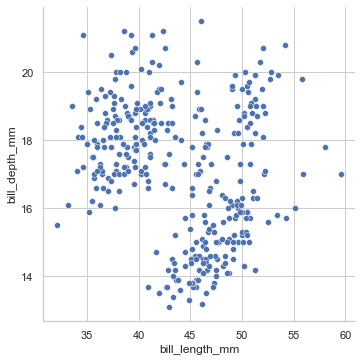

In [4]:
sns.relplot(x='bill_length_mm', y='bill_depth_mm', data=penguins);

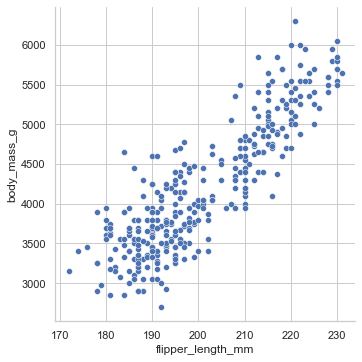

In [5]:
sns.relplot(x='flipper_length_mm', y='body_mass_g', data=penguins);

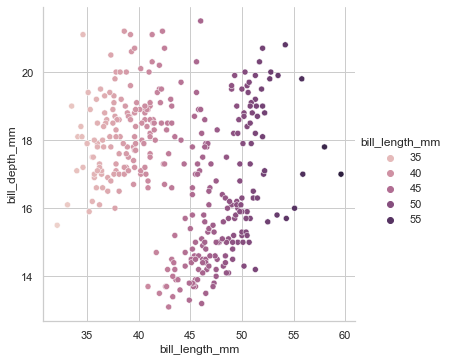

In [6]:
sns.relplot(x='bill_length_mm', y='bill_depth_mm', 
            hue='bill_length_mm', data=penguins);

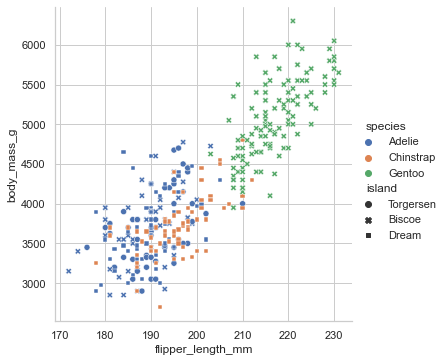

In [7]:
sns.relplot(x='flipper_length_mm', y='body_mass_g', 
            hue='species', style='island',data=penguins);

### col

위처럼 그릴씨 가독성이 떨어지므로 style 로 구분하는거 대신에  
col 을 사용해서 따로 나타내어 보자

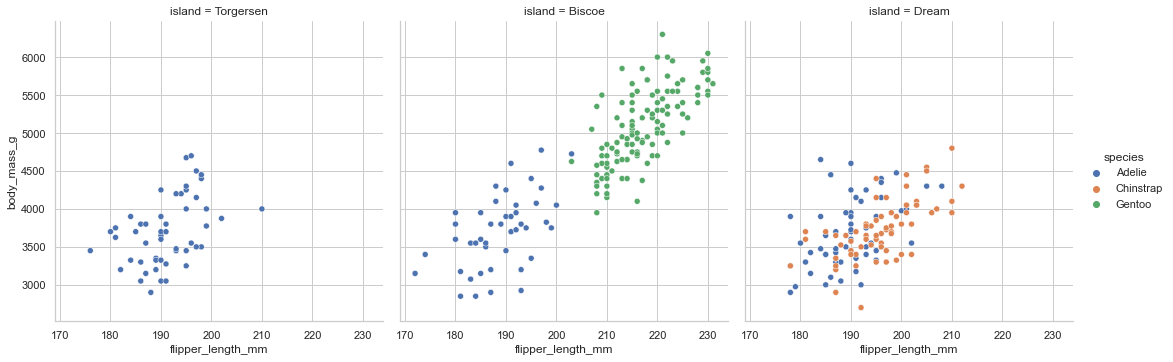

In [8]:
sns.relplot(x='flipper_length_mm', y='body_mass_g', 
            hue='species', col='island',data=penguins);

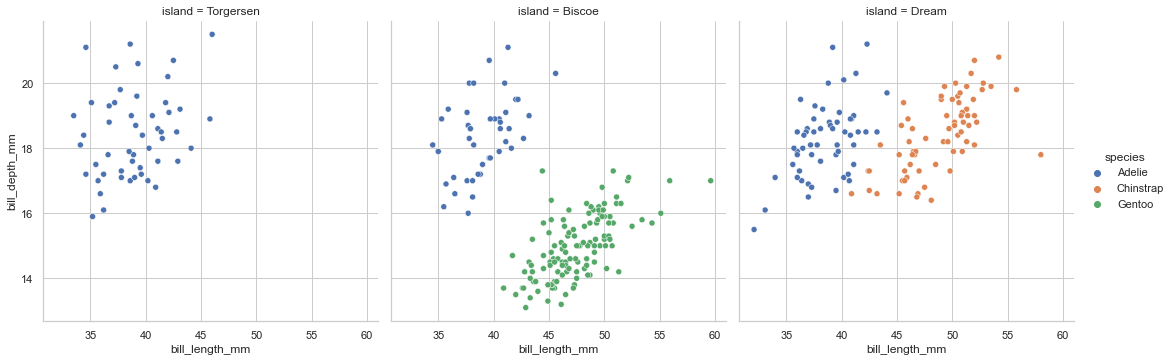

In [9]:
sns.relplot(x='bill_length_mm', y='bill_depth_mm', 
            hue='species', col='island', data=penguins);

### size 
다른 구별법 size 를 사용하여 지정

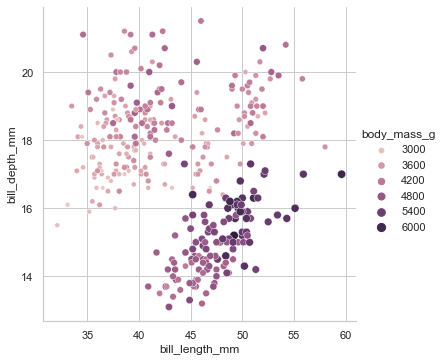

In [10]:
sns.relplot(x='bill_length_mm', y='bill_depth_mm', 
            hue='body_mass_g', size='body_mass_g', data=penguins);

## size 수동 조절

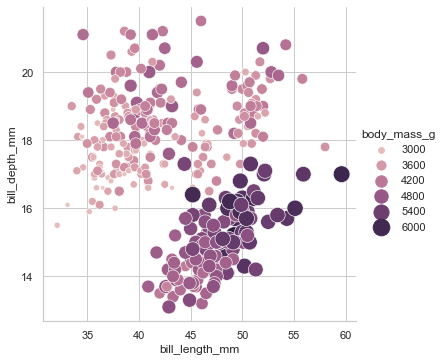

In [11]:
sns.relplot(x='bill_length_mm', y='bill_depth_mm', 
            hue='body_mass_g', size='body_mass_g',
            sizes=(10, 300), data=penguins);

In [12]:
flights = sns.load_dataset('flights')
flights.head(3)

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132

## 라인 플롯(Line Plot)

sns.relplot(kind='line')

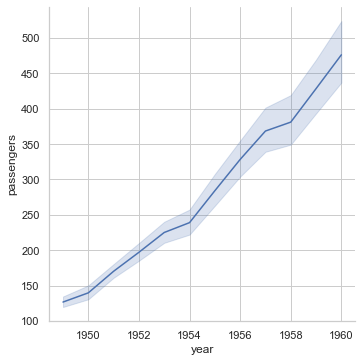

In [13]:
sns.relplot(x='year', y='passengers', kind='line', data=flights);

In [14]:
dots = sns.load_dataset('dots')
dots.head(3)

align choice  time  coherence  firing_rate
0  dots     T1   -80        0.0    33.189967
1  dots     T1   -80        3.2    31.691726
2  dots     T1   -80        6.4    34.279840

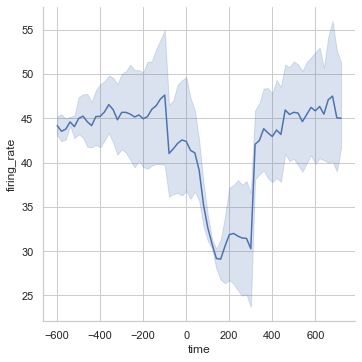

In [15]:
sns.relplot(x='time', y= 'firing_rate',
            kind='line', data=dots);

### 신뢰구간 95% 을 보여주는 범위

ci=None

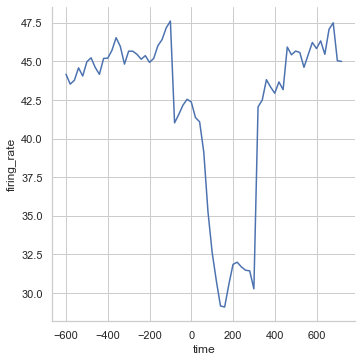

In [16]:
sns.relplot(x='time', y= 'firing_rate',
            ci=None, kind='line', data=dots);

ci = 95% : 신뢰구간(95%) default   
ci = sd : 표준편차
ci = None " 제거

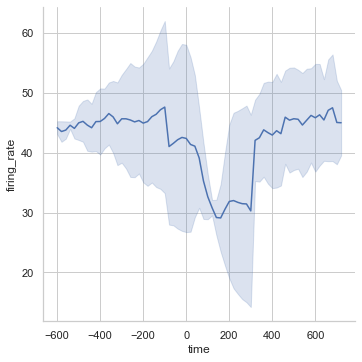

In [17]:
sns.relplot(x='time', y= 'firing_rate',
            ci='sd', kind='line', data=dots);

### estimator 
실제 값

estimator를 None 으로 했을때에는 실제값을 보여주게된다. 

위의 그래프와 아래의 그래프를 비교해보면 위에는 통계값을 범위로 표현하여 중심선(평균?!)을 나타 낸 것이고, 아래는 포인트와 포인트를 연결한 선이다. 

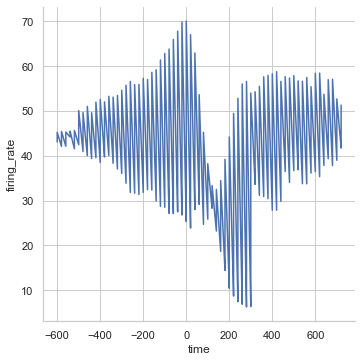

In [18]:
sns.relplot(x='time', y= 'firing_rate',
            estimator=None, kind='line', data=dots);

### hue

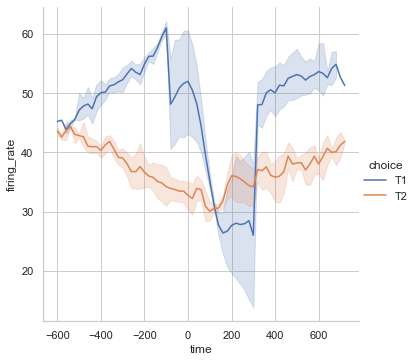

In [19]:
sns.relplot(x='time', y='firing_rate',
            hue='choice', kind='line', data=dots);

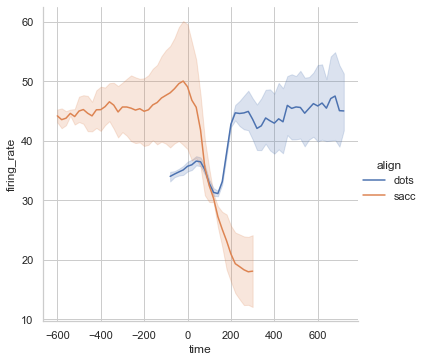

In [20]:
sns.relplot(x='time', y='firing_rate',
            hue='align', kind='line', data=dots);

### style

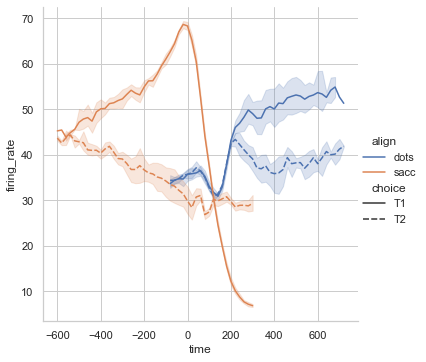

In [21]:
sns.relplot(x='time', y='firing_rate',
           hue='align', style='choice',
           kind='line', data=dots);

### markers

* dashes 역활?!

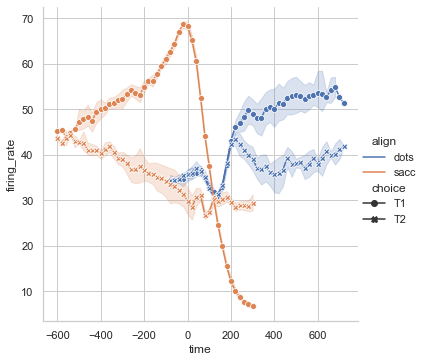

In [22]:
sns.relplot(x='time', y='firing_rate',
           hue='align', style='choice',
            dashes=False, markers=True,
           kind='line', data=dots);

####  col

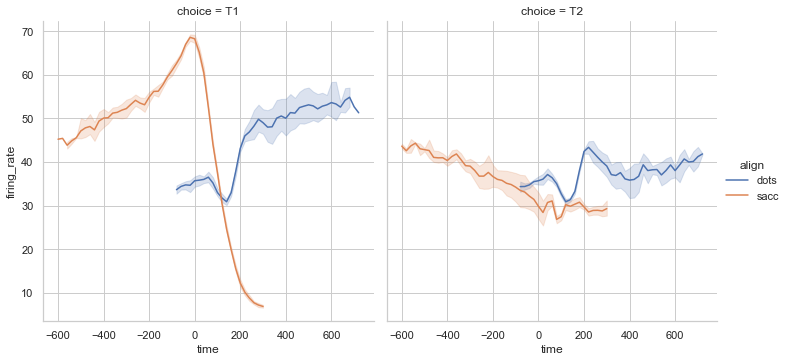

In [23]:
sns.relplot(x='time', y='firing_rate',
           hue='align', col='choice',
           kind='line', data=dots);

### query

세분화 하는 방법

data에서 query를 날려서 부분만을 취합하면 바로 정보를 알수있다.

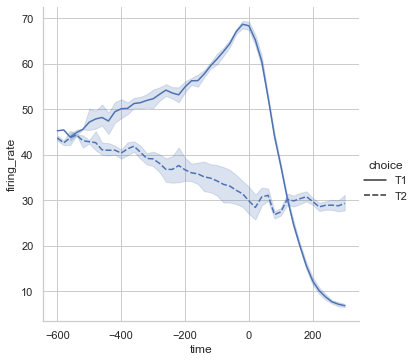

In [24]:
sns.relplot(x='time', y='firing_rate',
            style='choice',
           kind='line', data=dots.query("align == 'sacc'"));

### hue를 사용하여서 세밀한 조정

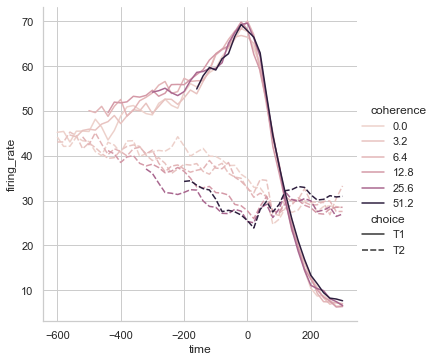

In [25]:
sns.relplot(x='time', y='firing_rate',
            hue='coherence', style='choice',
           kind='line', data=dots.query("align == 'sacc'"));

####  col

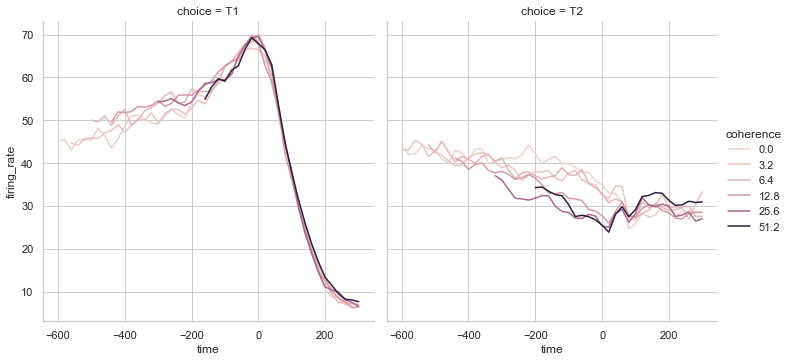

In [26]:
sns.relplot(x='time', y='firing_rate',
            hue='coherence', col='choice',
           kind='line', data=dots.query("align == 'sacc'"));

In [27]:
fmri = sns.load_dataset('fmri')
fmri.head(3)

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033

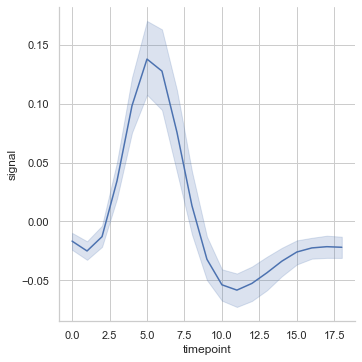

In [28]:
sns.relplot(x='timepoint', y='signal',
           kind='line', data=fmri);

### sort

seaborn 은 x 축의 데이터를 sort을 자동으로 지원해 준다. 

x 축의 데이터가 중구난방이어도 오름 차순으로 배열하여 line 그래프를 그리는데, 때로는 필요 없을때에도 있다.

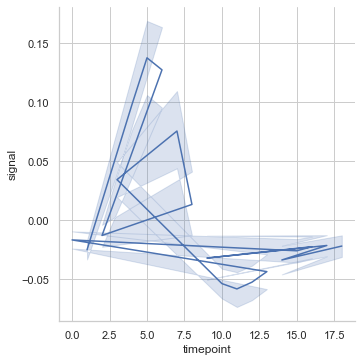

In [29]:
sns.relplot(x='timepoint', y='signal',
            sort=False,
           kind='line', data=fmri);

### size

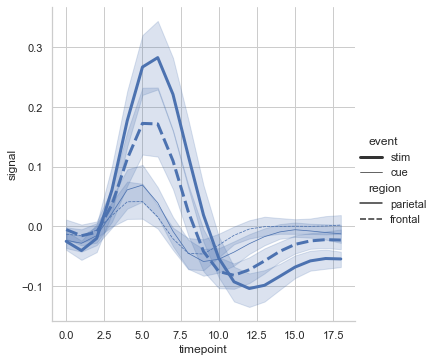

In [30]:
sns.relplot(x='timepoint', y='signal',
            style='region', size='event',
            kind='line', data=fmri);

### 좋은 그래프를 찾는 방법
위와 같은 형식으 보기 불편하기때문에 피해야한다. 

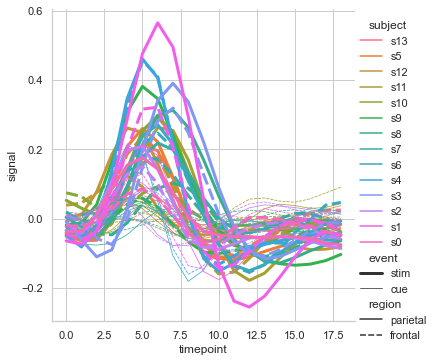

In [31]:
sns.relplot(x='timepoint', y='signal',
            style='region',hue='subject', size='event',
            kind='line', data=fmri);

위에는 너무 복잡하고,   
아래는 너무 많다.

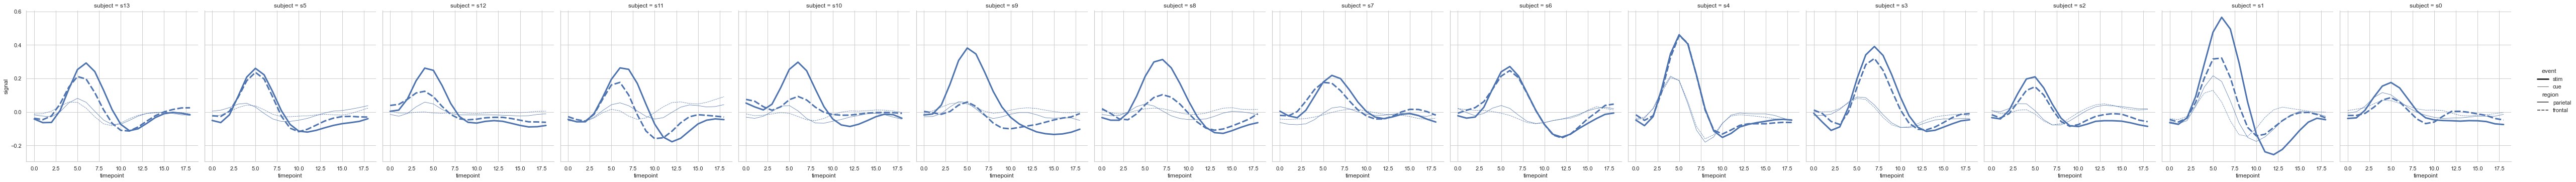

In [32]:
sns.relplot(x='timepoint', y='signal',
            style='region',col='subject',
            size='event',
            kind='line', data=fmri);

그나마 나아졌지만, 아직 너무 복잡하다. 

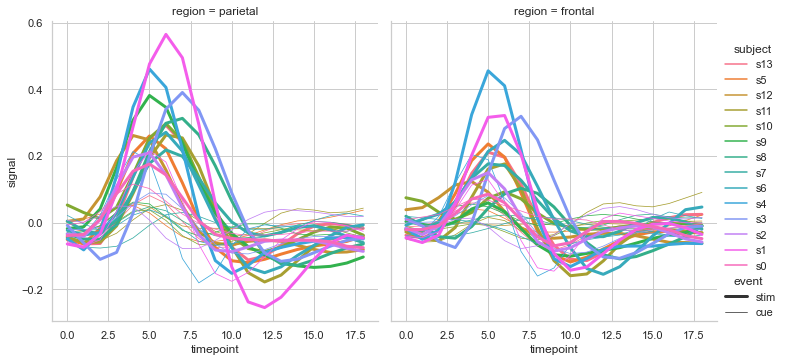

In [33]:
sns.relplot(x='timepoint', y='signal',
            hue='subject', col='region',
            size='event',
            kind='line', data=fmri);

####  palette 

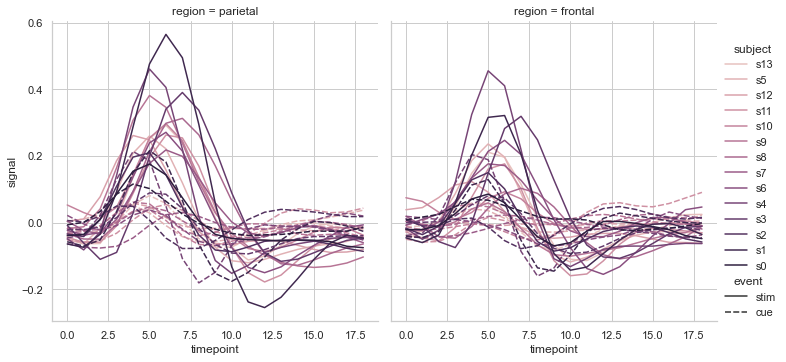

In [34]:
palette = sns.cubehelix_palette(n_colors=14, light=0.8)
sns.relplot(x='timepoint', y='signal',
            hue='subject', col='region',
            style='event', palette=palette,
            kind='line', data=fmri);

아직도 복잡함으로~    

query로 필요 정보만 추려보자  

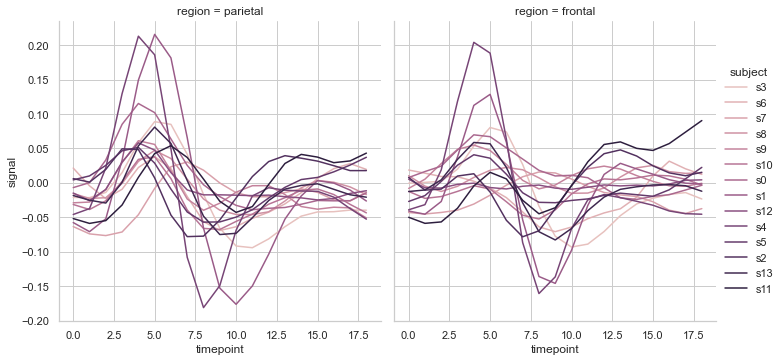

In [35]:
sns.relplot(x='timepoint', y='signal',
            hue='subject', col='region',
            palette=palette,
            kind='line', data=fmri.query("event == 'cue'"));

#### row

로우로 세분화 해보자

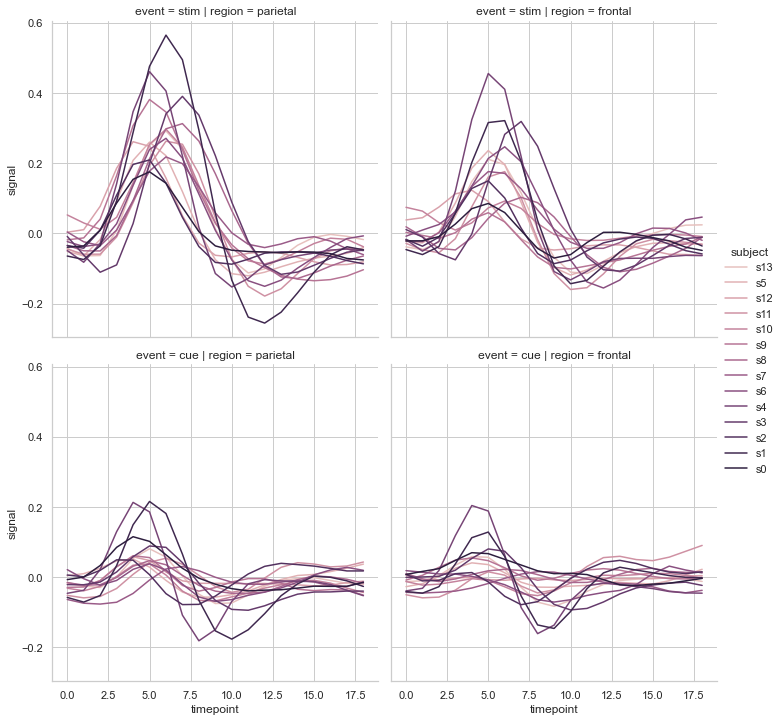

In [36]:
sns.relplot(x='timepoint', y='signal',
            hue='subject', col='region', row='event',
            palette=palette,
            kind='line', data=fmri);

#### col_wrap= : 한줄에 몇개의 col 를 넣을꺼니?!

다른 조정 방법

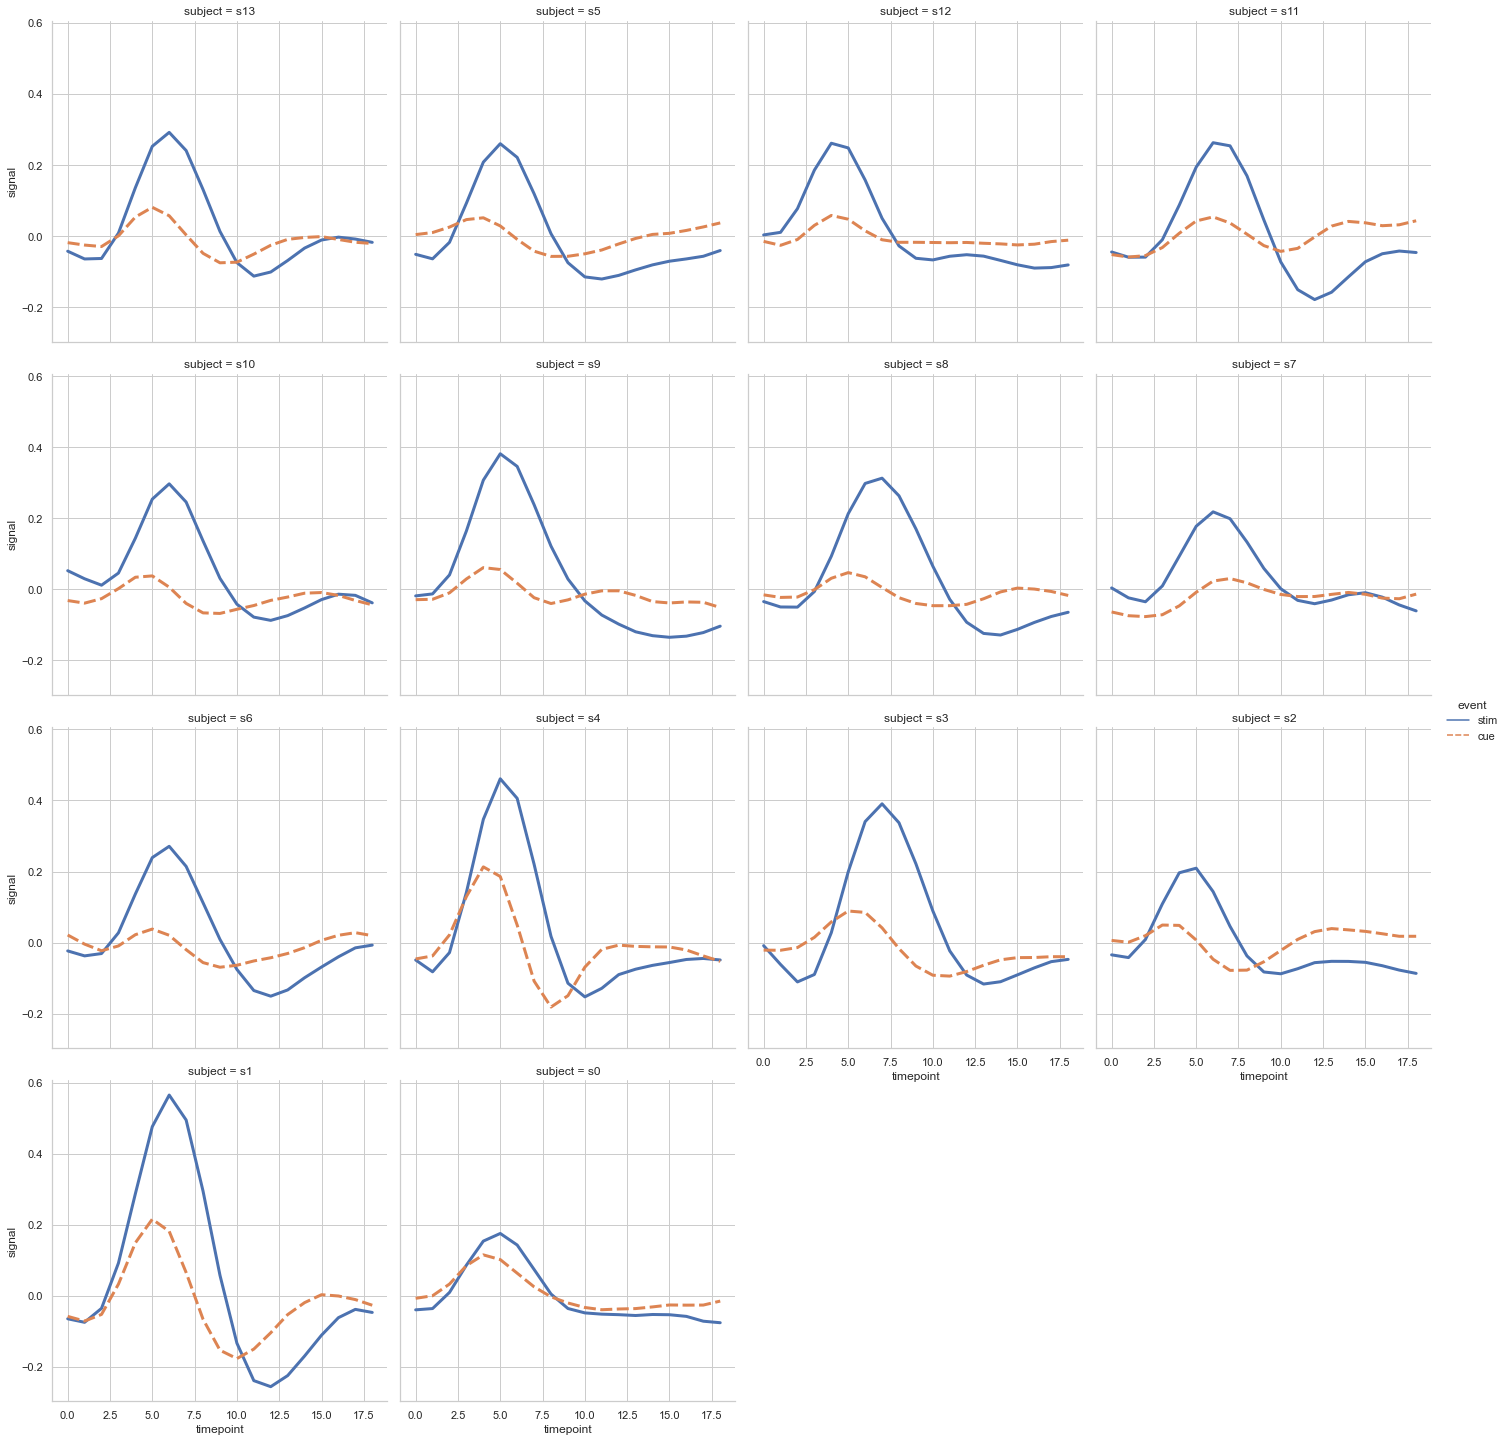

In [37]:
sns.relplot(x='timepoint', y='signal',
            hue='event', style='event',
            col='subject', col_wrap=4, linewidth=3,
            kind='line', data=fmri.query("region == 'parietal'"));

In [38]:
tdf = pd.DataFrame(np.random.randn(40, 4),
                   index=pd.date_range('2020-01-01', periods=40),
                   columns=['A','B','C','D'])
tdf

A         B         C         D
2020-01-01 -0.773875 -0.237325 -0.502547 -1.116800
2020-01-02  1.666464 -1.871526 -0.571557 -0.813222
2020-01-03  1.797359  1.653220  0.818476  0.818319
2020-01-04 -0.944722  0.604255 -0.474553  0.771443
2020-01-05  1.012007 -0.587799 -1.010343 -0.258662
2020-01-06 -1.043501 -0.024815  1.035922  1.483755
2020-01-07 -1.305085  0.717359  0.008474  1.159869
2020-01-08  0.579270  0.274384  1.189559 -0.081636
2020-01-09  0.923699  1.874925 -0.976759  0.889007
2020-01-10  1.752106 -1.585462 -1.998800 -0.033278
2020-01-11 -0.832100  0.943233 -2.804563 -0.941360
2020-01-12  0.173142 -0.234078 -1.316630  0.155377
2020-01-13 -0.175337 -1.506750 -0.346114  0.555142
2020-01-14  0.282747 -1.784979 -0.075126 -0.514444
2020-01-15  1.804394 -1.207658  0.980795  0.056679
2020-01-16 -0.178161  0.300556 -0.596703  0.629116
2020-01-17 -2.050099  0.116813  0.734251  0.028292
2020-01-18  1.088145 -0.892960  2.014605  0.955477
2020-01-19 -0.583830 -0.375923  1.746263 -0.561709
2020-01-20  0.660315  0.034321  1.205464  1.656968
2020-01-21 -0.896026 -0.923273 -0.325402 -1.063275
2020-01-22 -0.863831  1.356482 -0.061497 -0.006053
2020-01-23 -0.490153  1.315018  0.274836 -0.751713
2020-01-24 -0.755488 -0.340204 -0.740147 -0.951673
2020-01-25  0.077637  1.399248  0.169054  1.326184
2020-01-26  0.922053  0.905488 -0.240291 -0.057338
2020-01-27  0.876216  0.466052  0.036530  0.064230
2020-01-28  0.745076 -0.736760 -0.469374 -0.488446
2020-01-29 -1.785077  0.576021  1.057833 -1.017724
2020-01-30  1.009264  0.422030 -0.241159 -1.348084
2020-01-31 -1.512397  0.794707  0.559483 -0.370878
2020-02-01 -1.049553  0.098954 -0.394837  0.762096
2020-02-02 -2.542005 -1.093784  1.821349  0.289549
2020-02-03  0.253350  0.127694  0.880224 -0.845318
2020-02-04  0.169508  0.664192  1.865152  0.674184
2020-02-05  0.593508 -0.759632  1.130473  1.872220
2020-02-06  0.161837  1.360838  0.466785 -1.381190
2020-02-07 -0.182183 -0.170365 -1.227904  0.725419
2020-02-08 -0.864928 -1.118844 -1.844480  0.653092
2020-02-09  1.545166 -0.793985  0.380132  0.713054

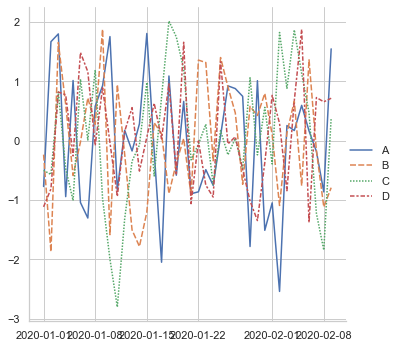

In [39]:
sns.relplot(kind='line', data=tdf);

위의 x축을 설정 해주는 방법

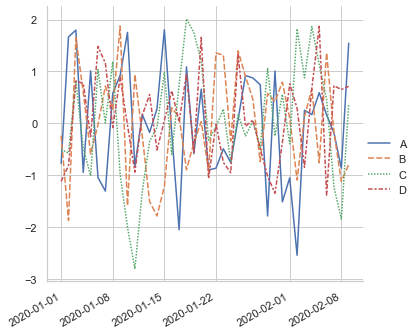

In [40]:
g = sns.relplot(kind='line', data=tdf);
g.fig.autofmt_xdate()

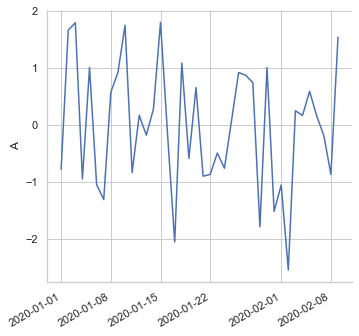

In [41]:
g = sns.relplot(kind='line', data=tdf['A']);
g.fig.autofmt_xdate()

## 범주형 데이터(Categorical Data)

### 범주형 산점도(Categorical scatterplots)

* `stripplot()` (with `kind="strip"`; the default)
* `swarmplot()` (with `kind="swarm"`)

sns.catplot

In [42]:
penguins = sns.load_dataset('penguins')
penguins.head(3)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female

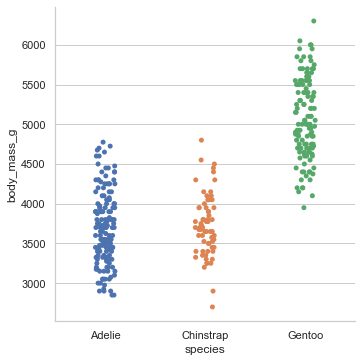

In [43]:
sns.catplot(x='species', y='body_mass_g', data=penguins);

#### jitter

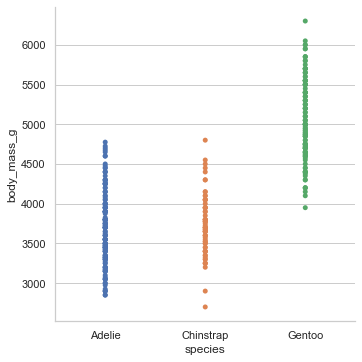

In [44]:
sns.catplot(x='species', y='body_mass_g', 
            jitter=False, data=penguins);

#### kind='swarm'

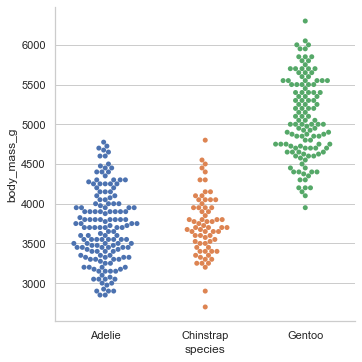

In [45]:
sns.catplot(x='species', y='body_mass_g', 
            kind='swarm', data=penguins);

#####  hue

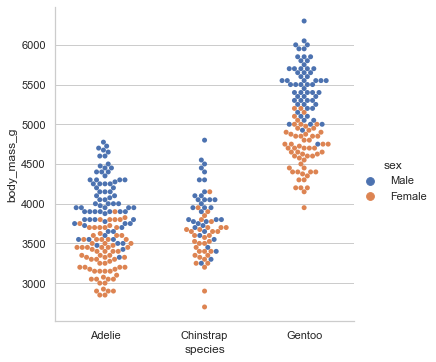

In [46]:
sns.catplot(x='species', y='body_mass_g', 
            hue='sex',
            kind='swarm', data=penguins);

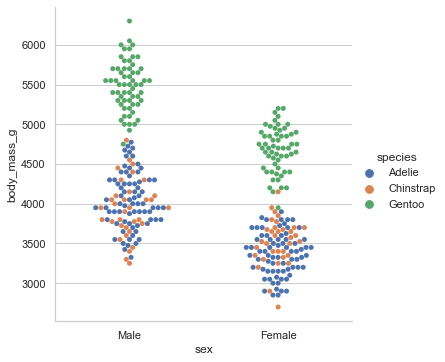

In [47]:
sns.catplot(x='sex', y='body_mass_g', 
            hue='species',
            kind='swarm', data=penguins);

#### 모양 조절 순서

order=[]

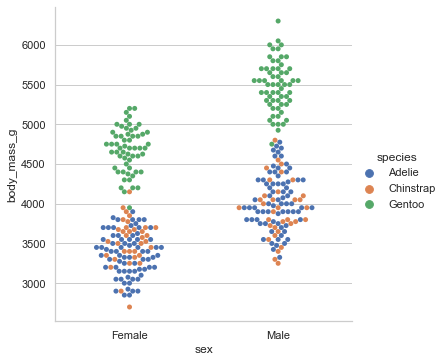

In [48]:
sns.catplot(x='sex', y='body_mass_g', 
            hue='species', kind='swarm',
            order=['Female','Male'], data=penguins);

#### 가로로 그리기

카테고리컬 데이터의 값을 y축에 넣게 되면 가로로 그려진다. 

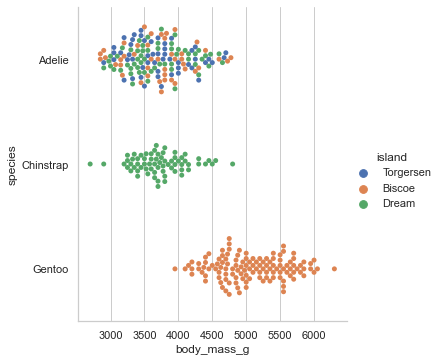

In [49]:
sns.catplot(x='body_mass_g', y='species', 
            hue='island', kind='swarm',
             data=penguins);

#### col

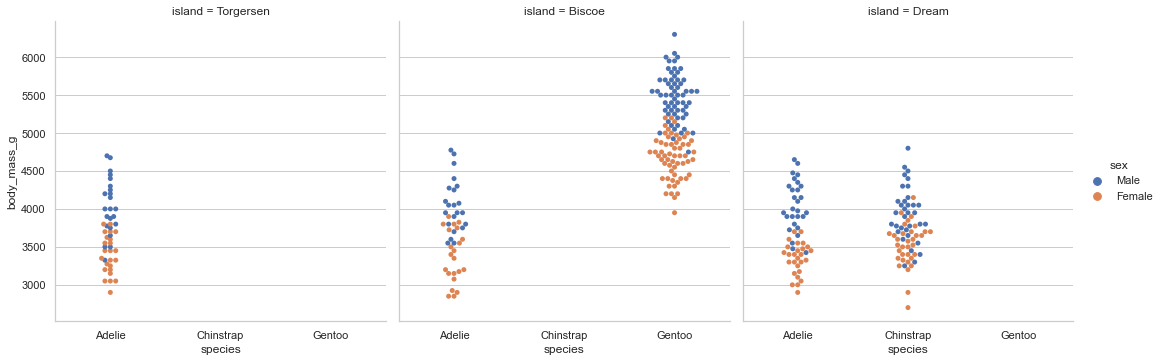

In [50]:
sns.catplot(x='species', y='body_mass_g',
            hue='sex', col='island', kind='swarm',
            data=penguins);

#### aspect

* 간격조절

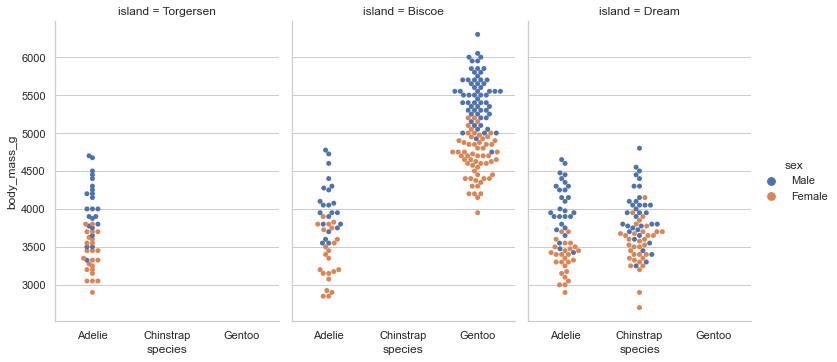

In [51]:
sns.catplot(x='species', y='body_mass_g',
            hue='sex', col='island', aspect=.7,
            kind='swarm',
            data=penguins);

### 범주형 분포도(Categorical distribution plots):
* `catplot()` (with `kind= `)
* `boxplot()` (with `kind="box"`)
* `boxenplot()` (with `kind="boxen"`)
* `violinplot()` (with `kind="violin"`)

#### 박스 플롯(Box plots)

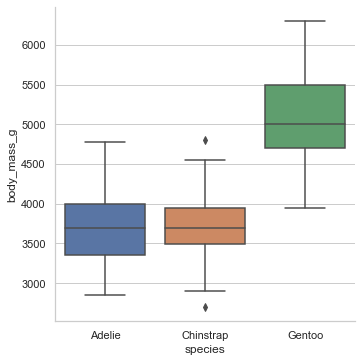

In [52]:
sns.catplot(x='species', y='body_mass_g',
            kind='box', data=penguins);

##### hue

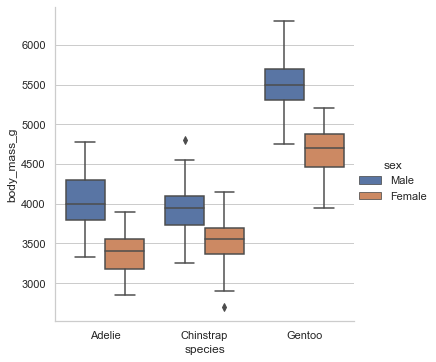

In [53]:
sns.catplot(x='species', y='body_mass_g',
            hue='sex',
            kind='box', data=penguins);

##### dodge=

위의 그래프를 아래처럼 x축 동일선에 

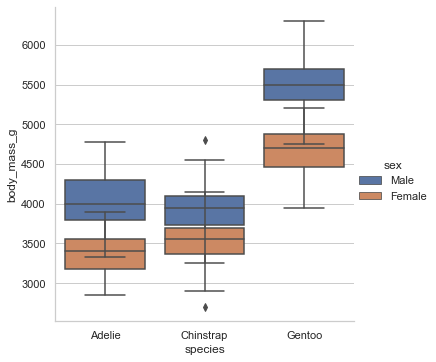

In [54]:
sns.catplot(x='species', y='body_mass_g',
            hue='sex',kind='box', 
            dodge=False,
            data=penguins);

##### col

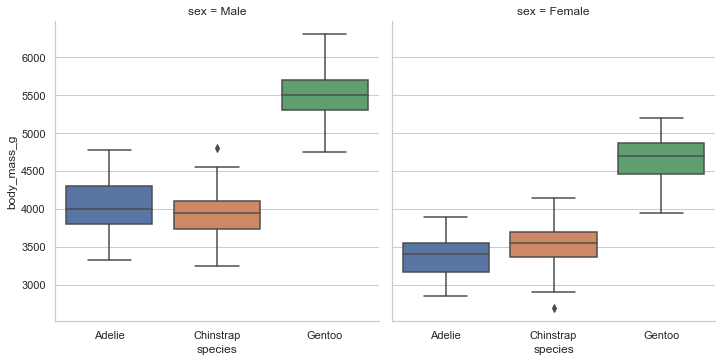

In [55]:
sns.catplot(x='species', y='body_mass_g',
            col='sex',
            kind='box', data=penguins);

#### row

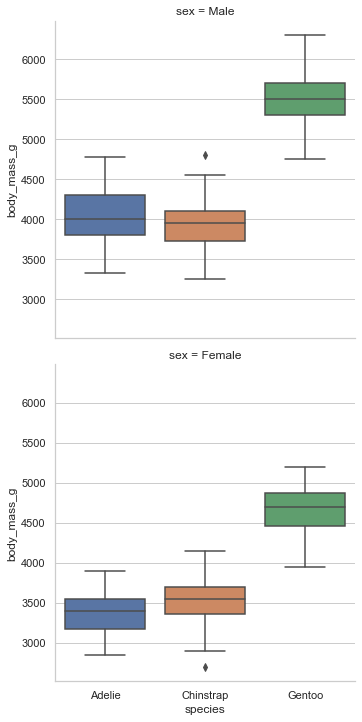

In [56]:
sns.catplot(x='species', y='body_mass_g',
            row='sex',
            kind='box', data=penguins);

 ##### aspect
 위에가 너무 기니까 aspect를 지정해서 사이지를 줄여 보자 

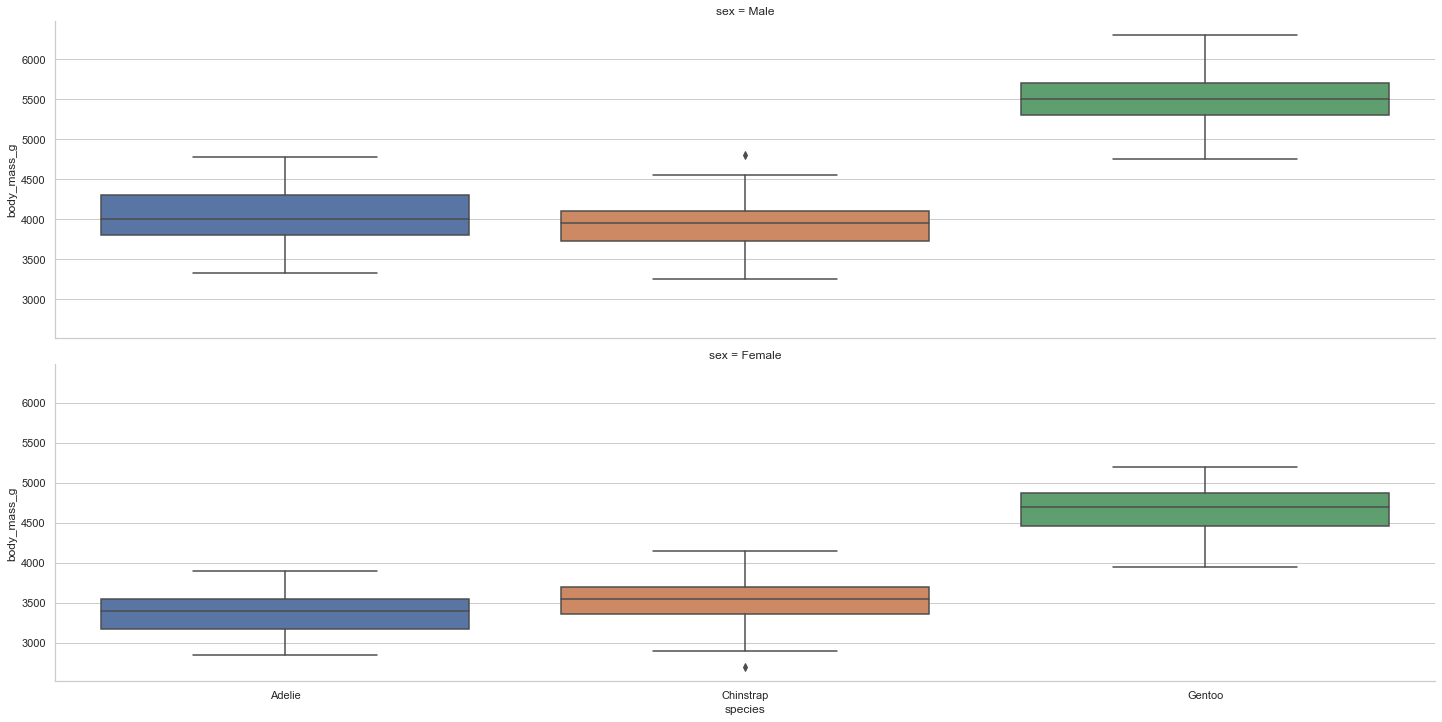

In [57]:
sns.catplot(x='species', y='body_mass_g',
            row='sex', aspect = 4,
            kind='box', data=penguins);

##### 가로세로 뒤집기

그려보니 이쁘지 않네 ~

x축과 y축을 뒤집으면 이쁘겠다. 

y값에 categorical value로 변환~

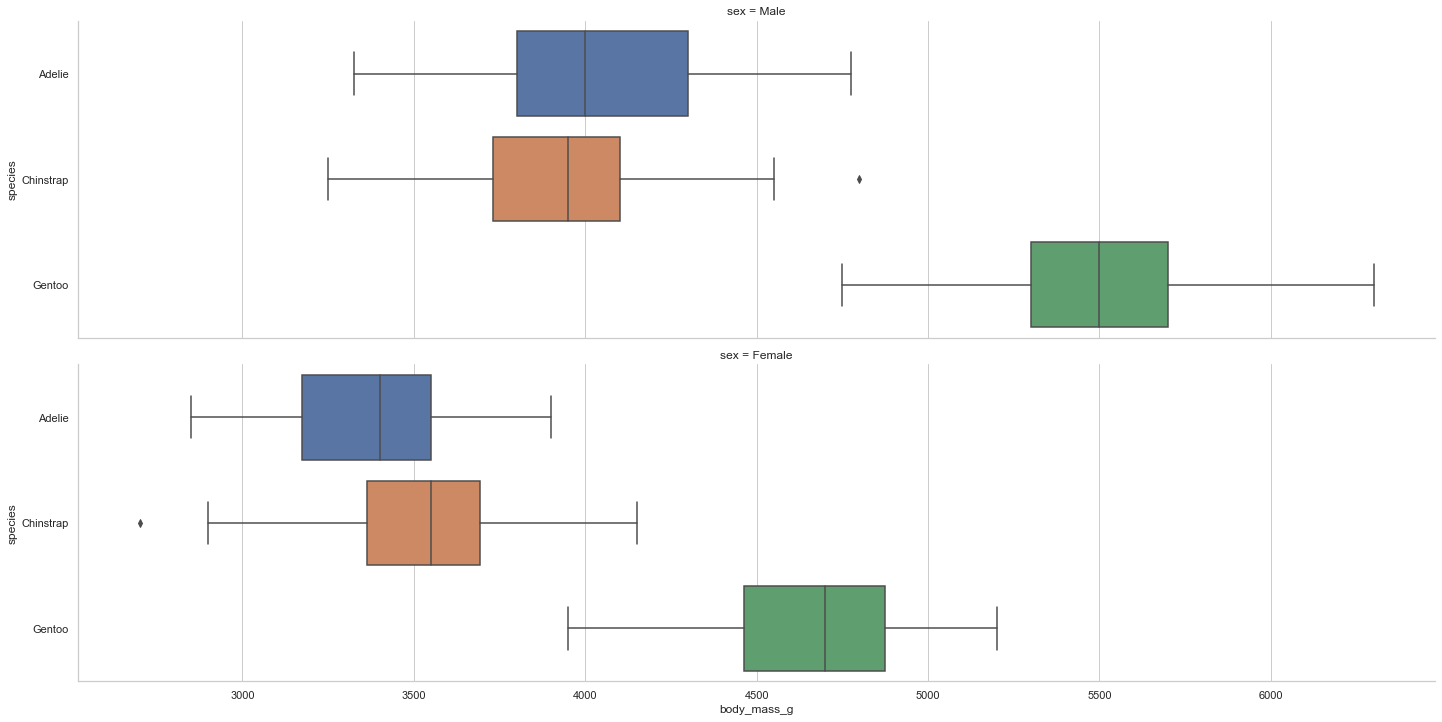

In [58]:
sns.catplot(x='body_mass_g', y='species',
            row='sex', aspect = 4,
            kind='box', data=penguins);

In [59]:
iris = sns.load_dataset('iris')
iris.head(3)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa

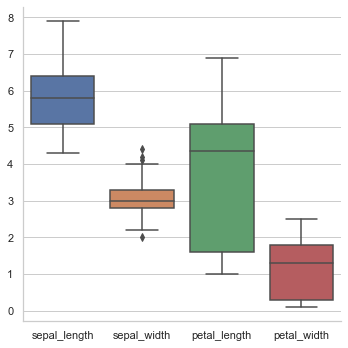

In [60]:
sns.catplot(kind='box', data=iris);

#### orient=
'h' : 가로로 보기 horizental

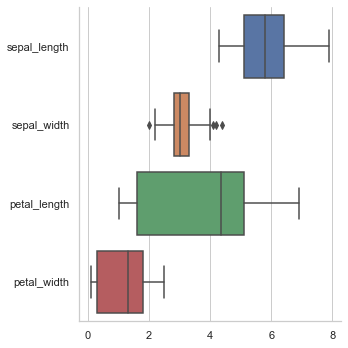

In [61]:
sns.catplot(kind='box',orient='h', data=iris);

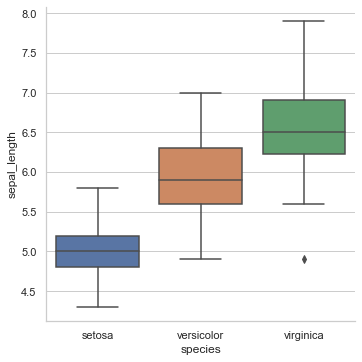

In [62]:
sns.catplot(x = 'species', y='sepal_length',
            kind='box', data=iris);

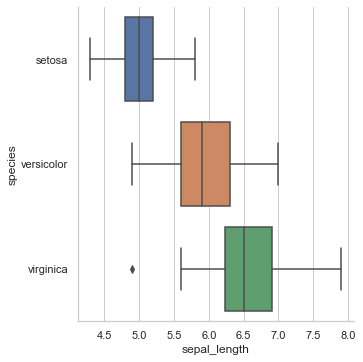

In [63]:
sns.catplot(x='sepal_length', y = 'species', 
            kind='box', data=iris);

#### 박슨 플롯(Boxen plots)

boxplot 보다 더 많은 정보를 가진 plots

In [64]:
diamonds = sns.load_dataset('diamonds')
diamonds.head(3)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31

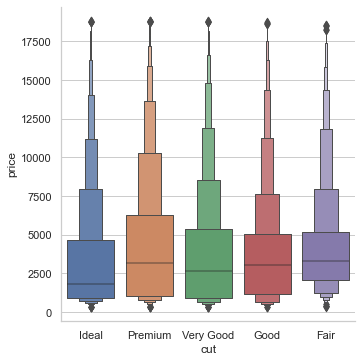

In [65]:
sns.catplot(x='cut', y='price',
            kind='boxen', data=diamonds);

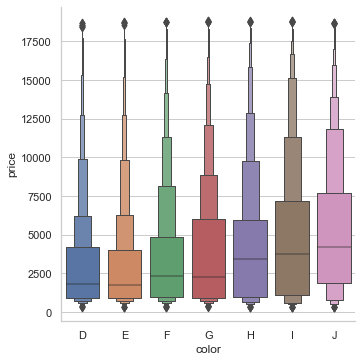

In [66]:
sns.catplot(x='color', y='price', 
            kind='boxen', data=diamonds);

##### sort_value 
을 활용하여 x축 값 정렬

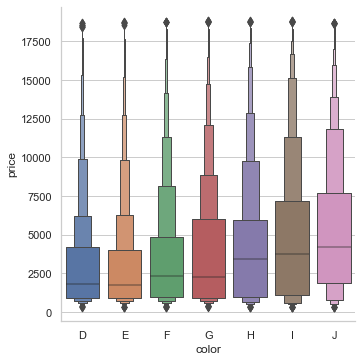

In [67]:
sns.catplot(x='color', y='price', 
            kind='boxen', data=diamonds.sort_values('color'));

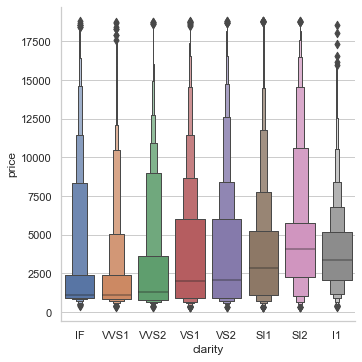

In [68]:
sns.catplot(x='clarity', y='price', 
            kind='boxen', data=diamonds);

#### 바이올린 플롯(Violin plots)

* `violinplot`: 커널 밀도 추정과 상자 도표 결합

In [69]:
penguins = sns.load_dataset('penguins')
penguins.head(3)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female

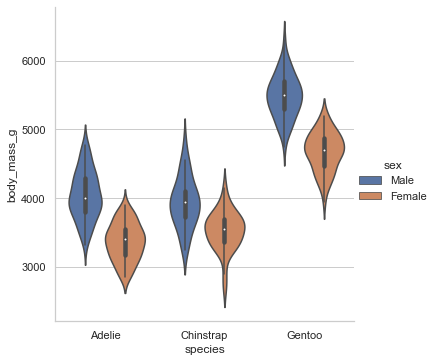

In [70]:
sns.catplot(x='species', y='body_mass_g',
            hue='sex', kind='violin', data=penguins);

##### bw, cut

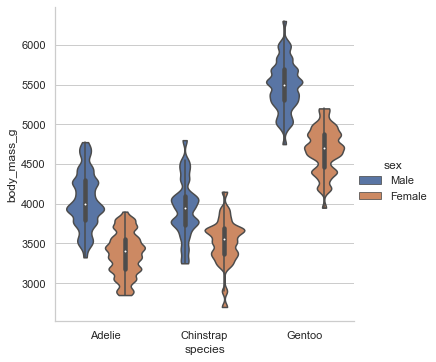

In [71]:
sns.catplot(x='species', y='body_mass_g',
            hue='sex', kind='violin',
            bw=.15, cut=0,
            data=penguins);

#####  split

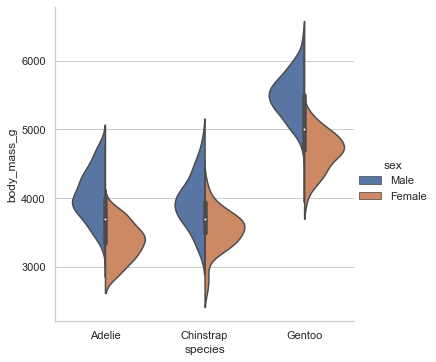

In [72]:
sns.catplot(x='species', y='body_mass_g',
            hue='sex', kind='violin',
            split=True,
            data=penguins);

##### inner

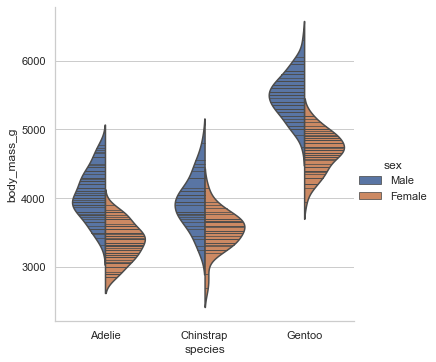

In [73]:
sns.catplot(x='species', y='body_mass_g',
            hue='sex', kind='violin',
            split=True, inner='stick',
            data=penguins);

#### 겹쳐그리기

ax = g.ax

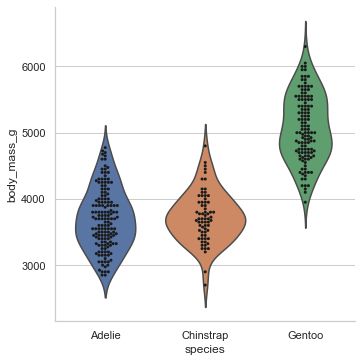

In [74]:
g = sns.catplot(x='species', y='body_mass_g',
             kind='violin',
            inner=None,
            data=penguins)

sns.swarmplot(x='species', y='body_mass_g',
              color='k', size=3,
              data=penguins, ax=g.ax);

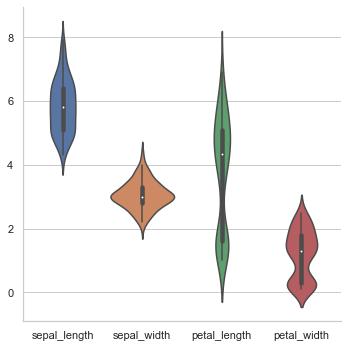

In [75]:
sns.catplot(data=iris, kind='violin');

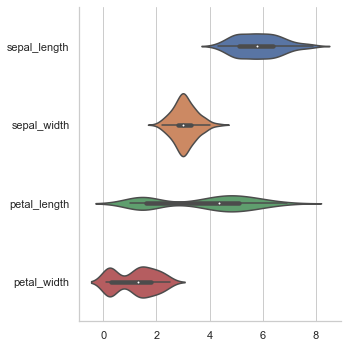

In [76]:
sns.catplot(data=iris, orient='h', kind='violin');

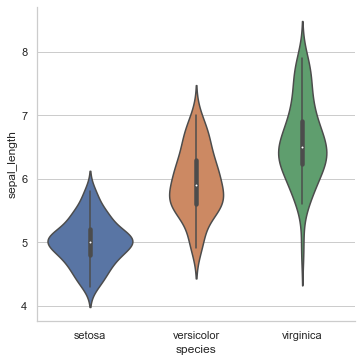

In [77]:
sns.catplot(x='species', y='sepal_length',
           kind='violin', data=iris);

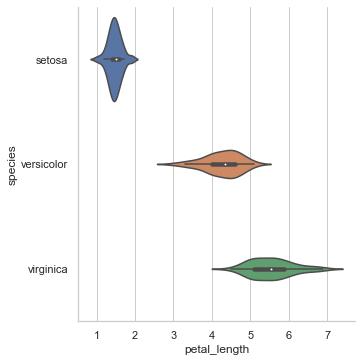

In [78]:
sns.catplot(x='petal_length', y='species',
           kind='violin', data=iris);

### 범주형 추정치 도표(Categorical estimate plots)

* `barplot()` (with `kind="bar"`)
* `pointplot()` (with `kind="point"`)
* `countplot()` (with `kind="count"`)

#### 막대 플롯(Bar plots)

In [79]:
mpg = sns.load_dataset("mpg")
mpg.head(3)

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite

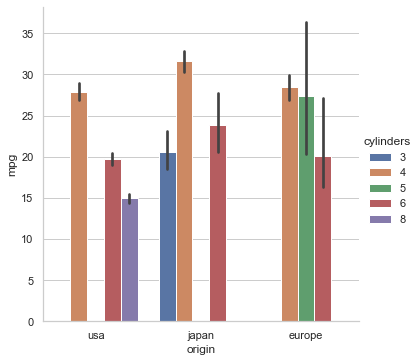

In [80]:
sns.catplot(x='origin', y='mpg',
            hue='cylinders', kind='bar',
            data=mpg);

##### palette

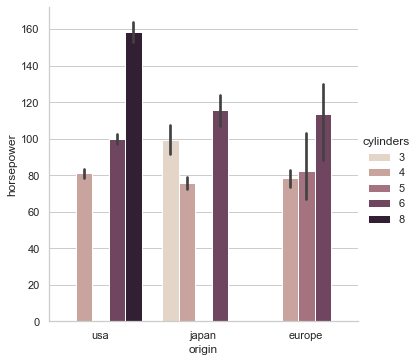

In [81]:
sns.catplot(x='origin', y='horsepower',
            hue='cylinders', kind='bar',
            palette='ch:.20',
            data=mpg);

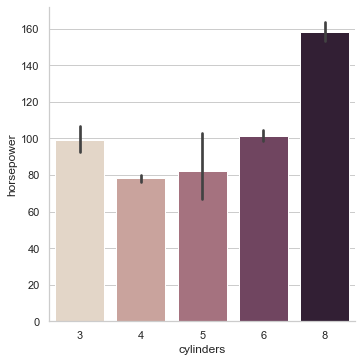

In [82]:
sns.catplot(x='cylinders', y='horsepower',
            kind='bar', palette='ch:.20',
            data=mpg);

##### edgecolor

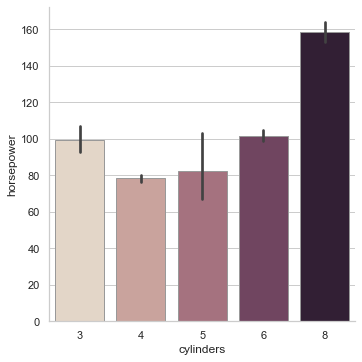

In [83]:
sns.catplot(x='cylinders', y='horsepower',
            kind='bar', palette='ch:.20', edgecolor='0.6',
            data=mpg);

#### 포인트 플롯(Point plots)

* 축의 높이를 사용하여 추정값을 인코딩하여 점 추정값과 신뢰 구간 표시

In [84]:
titanic = sns.load_dataset('titanic')
titanic.head(3)

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True

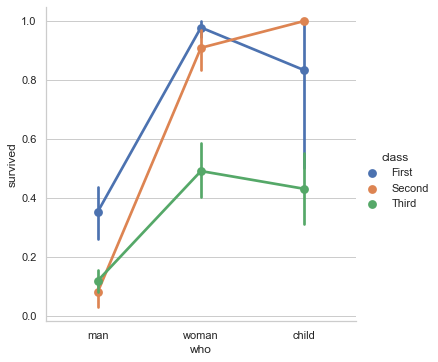

In [85]:
sns.catplot(x='who', y='survived',
            hue='class', kind='point',
            data=titanic);

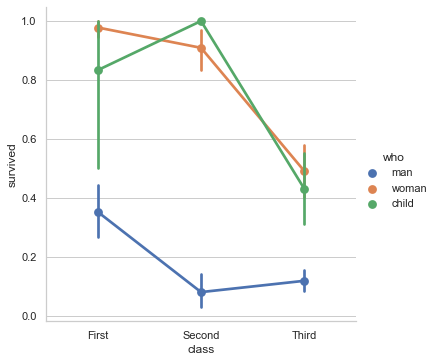

In [86]:
sns.catplot(x='class', y='survived',
            hue='who', kind='point',
            data=titanic);

#### palette=, markes=, linestyles=

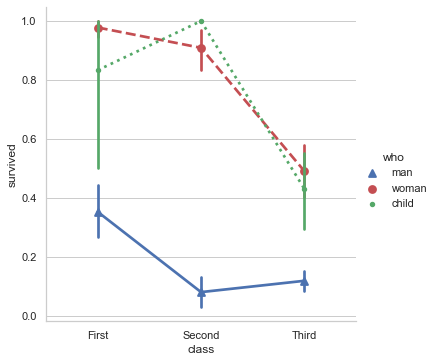

In [87]:
sns.catplot(x='class', y='survived',
            hue='who', 
            palette={'man':'b','woman':'r', 'child':'g'},
            markers=['^', 'o','.'], linestyles=['-','--',':'],
            kind='point', data=titanic);

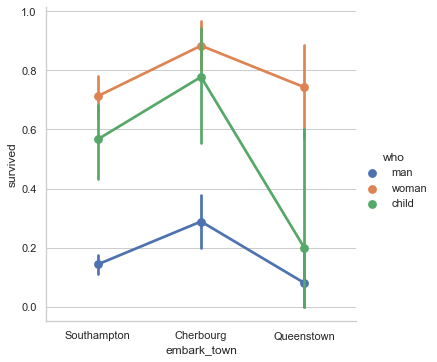

In [88]:
sns.catplot(x='embark_town', y='survived',
            hue='who', kind='point',
            data=titanic);

#### 카운트 플롯(Count plots)

가로로 그려줘~

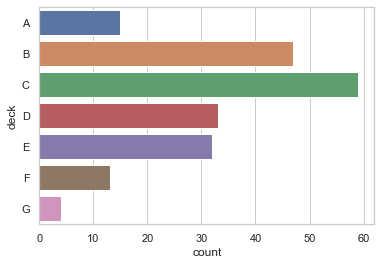

In [89]:
sns.countplot(y='deck', data=titanic);

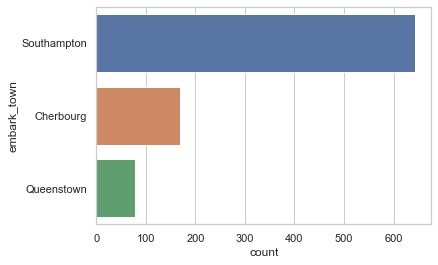

In [90]:
sns.countplot(y='embark_town', data=titanic);

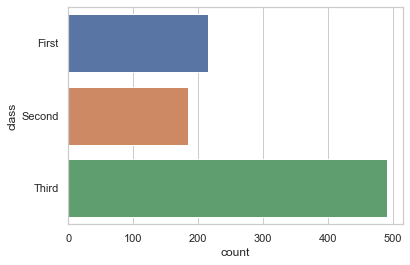

In [91]:
sns.countplot(y='class', data=titanic);

## 분포 시각화(Distribution Visualization)

### 일변량 분포(Univariate distributions)

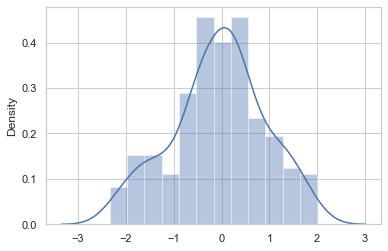

In [92]:
x = np.random.randn(200)
sns.distplot(x);

#### 히스토그램(Histograms)

kde = 대신에 rug= 로

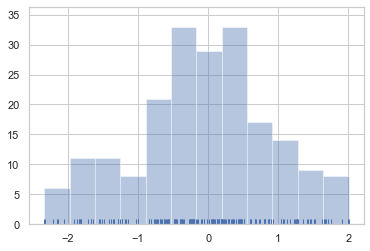

In [93]:
sns.distplot(x, kde=False, rug=True);

bins=

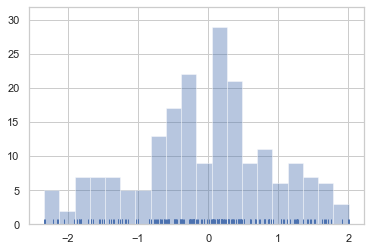

In [94]:
sns.distplot(x, kde=False, rug=True, bins=20);

#### 커널 밀도 추정(Kernel density estimation)

distplot에서  

hist= 를 죽이고 kde 를 살리면

kdeplot 이 된다 .

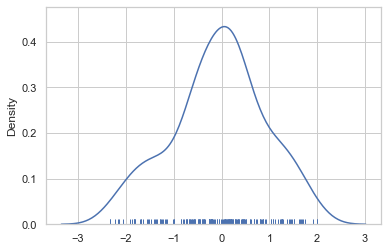

In [95]:
sns.distplot(x, hist=False, rug=True);

#### kdeplot
shade=

색칠하기

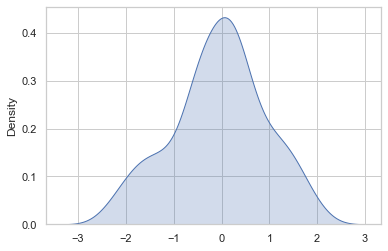

In [96]:
sns.kdeplot(x, shade=True);

#### bw 


커널의 크기 조절


bandwidth 조절 

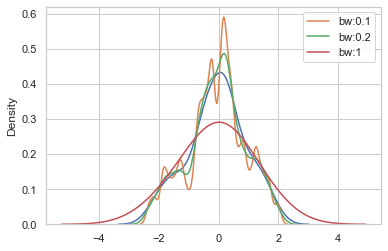

In [97]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.1, label='bw:0.1')
sns.kdeplot(x, bw=.2, label='bw:0.2')
sns.kdeplot(x, bw=1, label='bw:1')
plt.legend();

#### cut

끝부분 잘라주기

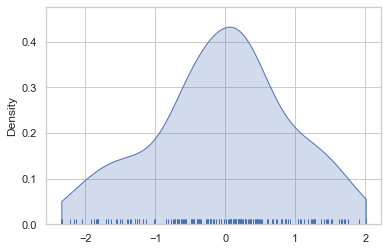

In [98]:
sns.kdeplot(x, shade=True, cut=0);
sns.rugplot(x);

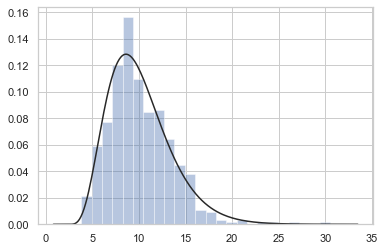

In [99]:
x = np.random.gamma(10, size=500)
sns.distplot(x, kde=False, fit=stats.gamma);

### 이변량 분포(Bivariate distributions)

#### 산점도(Scatterplots)

* `jointplot`: 두 개의 변수 간의 이변량(또는 joint) 관계와 별도의 축에 각각의 일변량(또는 marginal) 분포가 모두 표시되는 다중 패널 플롯 생성

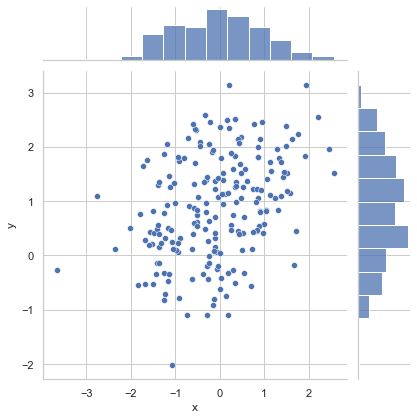

In [100]:
mean = [0, 1]
cov = [ (1, .3), (.3, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=['x', 'y'])

sns.jointplot(x='x', y='y', data=df);

#### 육각 빈 플롯(Hexbin plots)

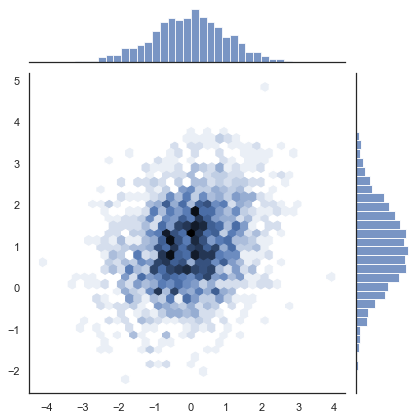

In [101]:
mean = [0, 1]
cov = [ (1, .3), (.3, 1)]
x, y = np.random.multivariate_normal(mean, cov, 2000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind='hex')

#### 커널 밀도 추정(Kernel density estimation)

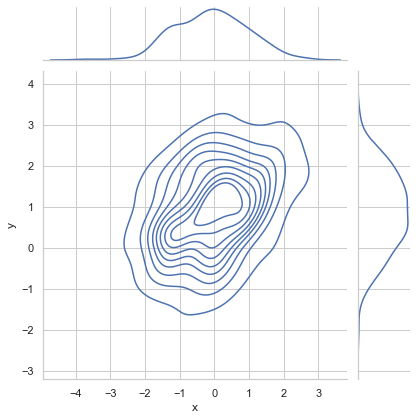

In [102]:
sns.jointplot(x='x', y='y', data=df, kind='kde');

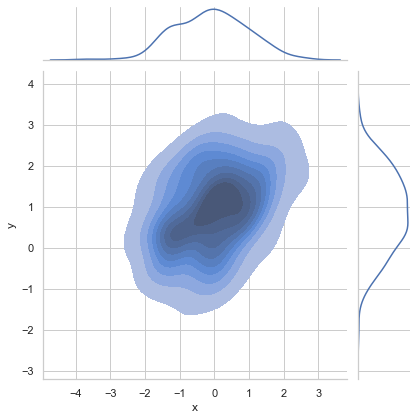

In [103]:
sns.jointplot(x='x', y='y', data=df, kind='kde',shade=True);

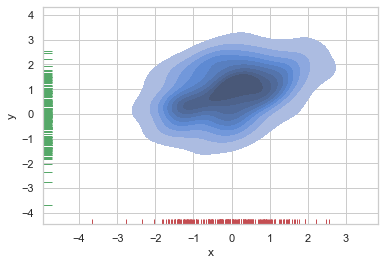

In [104]:
sns.kdeplot(df.x, df.y, shade=True)
sns.rugplot(df.x, color='r')
sns.rugplot(df.x, color='g', vertical=True);

#### palette

<AxesSubplot:xlabel='x', ylabel='y'>

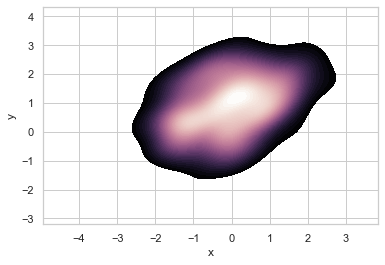

In [105]:
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, 
            n_levels=60, shade=True)

thresh, levels

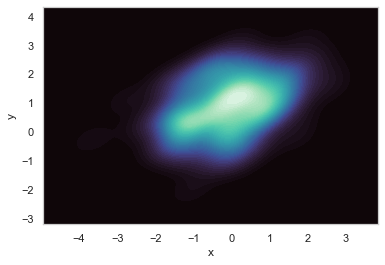

In [106]:
sns.kdeplot(df.x, df.y, thresh=0.0, levels=100,
            cmap='mako', n_levels=60, shade=True);

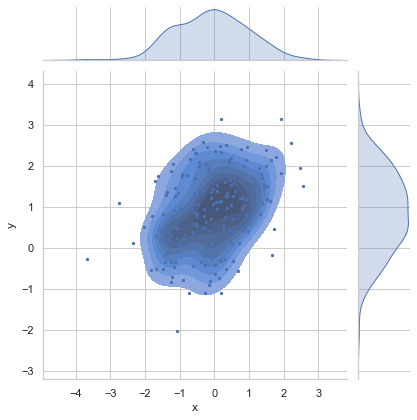

In [107]:
g = sns.jointplot(x='x', y='y', data=df, kind='kde', fill=True)
g.plot_joint(plt.scatter, s=20, linewidth=1, marker='.')
g.ax_joint.collections[0].set_alpha(0)

### 페어와이즈 관계 시각화(Visualizing pairwise relationships)

In [108]:
penguins = sns.load_dataset('penguins')
penguins.head(3)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female

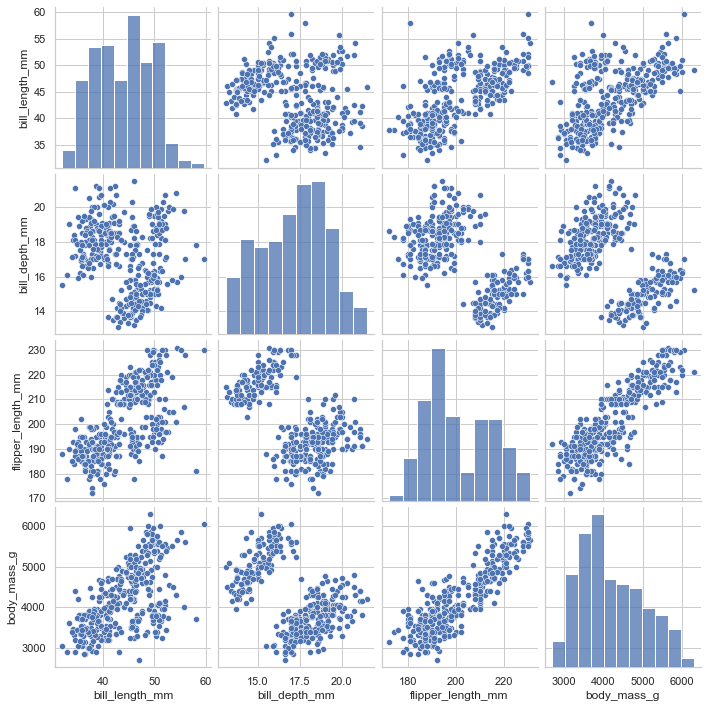

In [109]:
sns.pairplot(penguins);

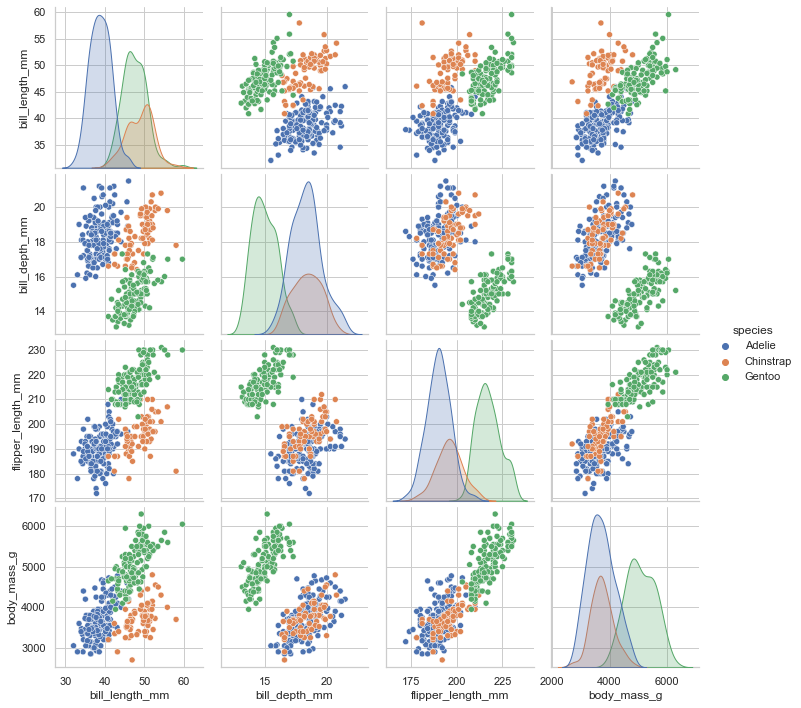

In [110]:
sns.pairplot(penguins, hue='species');

패어 플롯 구조에서 kde 형식으로 나타내는 

Pair Grid

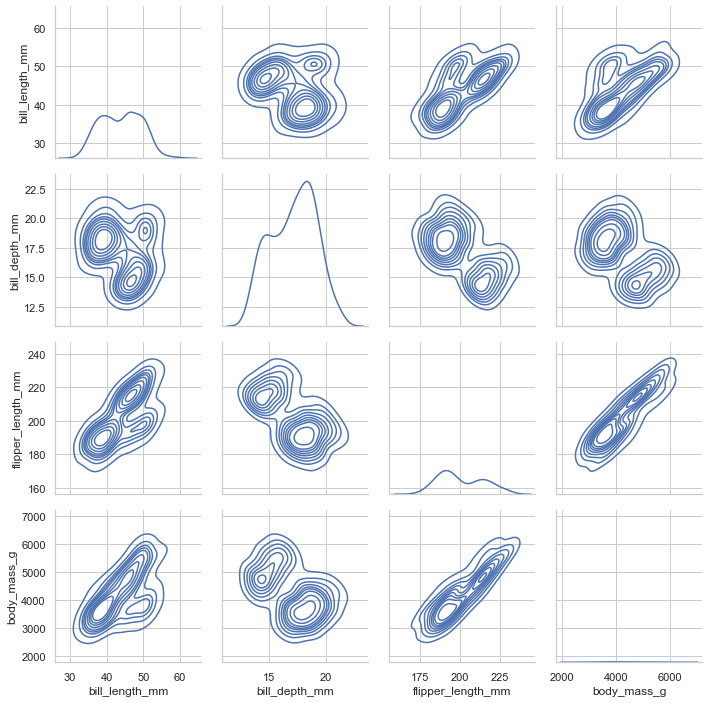

In [111]:
g = sns.PairGrid(penguins)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_level=6);

### 히트맵(Heat Map) & 클러스터맵(Cluster Map)

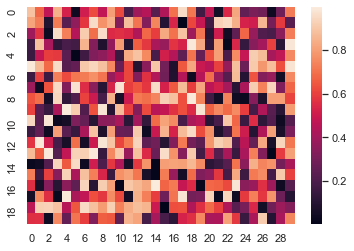

In [112]:
udata = np.random.rand(20, 30)
sns.heatmap(udata);

##### vmin, vmax

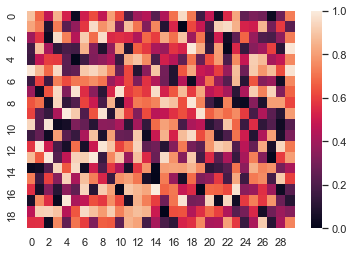

In [113]:
sns.heatmap(udata, vmin=0, vmax=1);

ceter= 기준값 설정

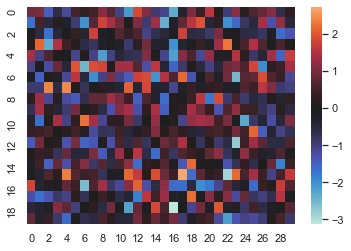

In [114]:
ndata=np.random.randn(20, 30)
sns.heatmap(ndata, center=0);

In [115]:
flights = sns.load_dataset('flights')
flights.head(3)

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132

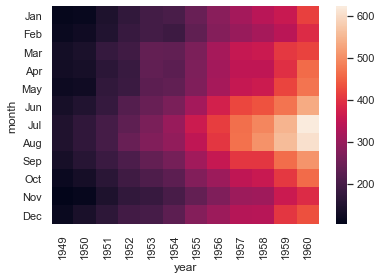

In [116]:
flights = flights.pivot('month', 'year', 'passengers')
sns.heatmap(flights);

##### annot = 

anotation 표시

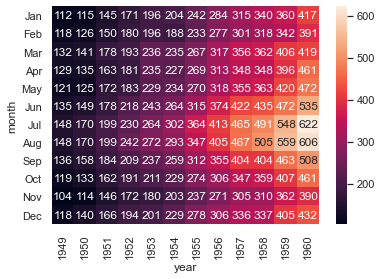

In [117]:
sns.heatmap(flights, annot=True, fmt='d');

##### linewidths =   서로 칸에 구분 넣어 주기

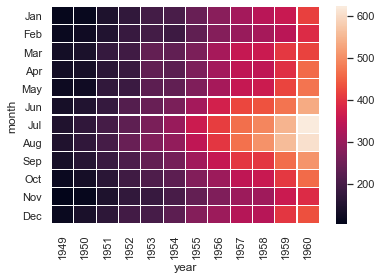

In [118]:
sns.heatmap(flights, linewidths=.2);

##### cmap=

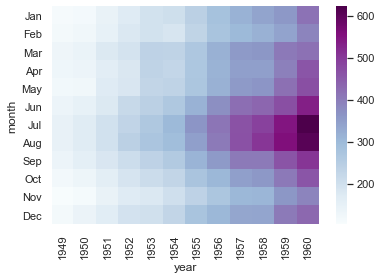

In [119]:
sns.heatmap(flights, cmap="BuPu");

cbar= 설정

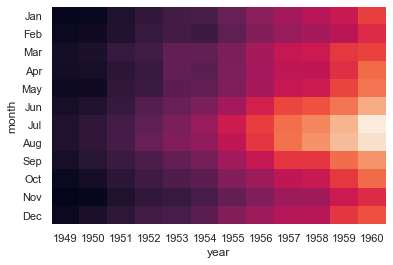

In [120]:
sns.heatmap(flights, cbar=False);

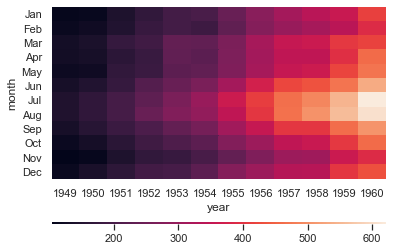

In [121]:
grid_kws = {"height_ratios": (.9, 0.01), "hspace": .5}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
ax = sns.heatmap(flights, ax=ax,
                        cbar_ax=cbar_ax,
                        cbar_kws={"orientation":"horizontal"})

In [122]:
brain_networks = sns.load_dataset('brain_networks', header=[0, 1, 2], index_col=0)
brain_networks

network           1                     2                     3             \
node              1                     1                     1              
hemi             lh         rh         lh         rh         lh         rh   
0         56.055744  92.031036   3.391576  38.659683  26.203819 -49.715569   
1         55.547253  43.690075 -65.495987 -13.974523 -28.274963 -39.050129   
2         60.997768  63.438793 -51.108582 -13.561346 -18.842947  -1.214659   
3         18.514868  12.657158 -34.576603 -32.665958  -7.420454  17.119448   
4         -2.527392 -63.104668 -13.814151 -15.837989 -45.216927   3.483550   
..              ...        ...        ...        ...        ...        ...   
915       -7.429513  -4.813219  -3.670537   1.442261 -19.680431 -29.109356   
916      -33.554138 -38.605621 -25.664803 -30.252352   5.562785  20.182186   
917      -78.539566 -74.197189 -54.041595 -39.970291 -14.277059 -30.606461   
918     -103.235825 -98.744286 -40.109543 -44.907734  12.109148   1.621340   
919      -36.288868 -10.762070 -30.356262 -23.319504  14.252188 -27.559860   

network          4                     5             ...          16  \
node             1                     1             ...           3   
hemi            lh         rh         lh         rh  ...          rh   
0        47.461037  26.746613 -35.898861  -1.889181  ...    0.607904   
1        -1.210660 -19.012897  19.568010  15.902983  ...   57.495071   
2       -65.575806 -85.777428  19.247454  37.209419  ...   28.317369   
3       -41.800869 -58.610184  32.896915  11.199619  ...   71.439629   
4       -62.613335 -49.076508  18.396759   3.219077  ...   95.597565   
..             ...        ...        ...        ...  ...         ...   
915      -3.376562  -8.764893   0.017912 -25.305094  ...   58.285793   
916      17.911247  24.653582 -32.935612 -21.783203  ...   59.864819   
917      60.628521  62.027023 -32.800556 -37.021500  ...   68.767868   
918      33.765560  55.356071 -14.330512 -17.224781  ...  103.155251   
919      17.279512 -19.060152  26.558777  21.377319  ...  102.086304   

network                                 17                                   \
node              4                      1                     2              
hemi             lh          rh         lh         rh         lh         rh   
0        -70.270546   77.365776 -21.734550   1.028253   7.791784  68.903725   
1        -76.393219  127.261360 -13.035799  46.381824 -15.752450  31.000332   
2          9.063977   45.493263  26.033442  34.212200   1.326110 -22.580757   
3         65.842979  -10.697547  55.297466   4.255006  -2.420144  12.098393   
4         50.960453  -23.197300  43.067562  52.219875  28.232882 -11.719750   
..              ...         ...        ...        ...        ...        ...   
915       68.557411   22.833048  76.179489  51.934669  -6.614513  -6.690762   
916       23.004578    7.657463  50.962399  13.696922  63.503616  57.401176   
917       49.664017   64.551498  43.800747   8.144480  47.281460  70.499649   
918      106.454849    9.046827  46.674419  40.954796   0.877180  37.577152   
919       80.051140   -2.642610 -12.229620  -6.596726  17.665163  16.153173   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  
..             ...         ...        ...  
915      22.893030   48.274380  76.228455  
916      24.974548   51.972153  64.538788  
917      66.994400   81.539246  64.969772  
918      20.517746    3.124434  56.718388  
919       8.300399   33.687531  17.960655  

[920 rows x 62 columns]

In [123]:
brain_networks.columns

MultiIndex([( '1', '1', 'lh'),
            ( '1', '1', 'rh'),
            ( '2', '1', 'lh'),
            ( '2', '1', 'rh'),
            ( '3', '1', 'lh'),
            ( '3', '1', 'rh'),
            ( '4', '1', 'lh'),
            ( '4', '1', 'rh'),
            ( '5', '1', 'lh'),
            ( '5', '1', 'rh'),
            ( '6', '1', 'lh'),
            ( '6', '1', 'rh'),
            ( '6', '2', 'lh'),
            ( '6', '2', 'rh'),
            ( '7', '1', 'lh'),
            ( '7', '1', 'rh'),
            ( '7', '2', 'lh'),
            ( '7', '2', 'rh'),
            ( '7', '3', 'lh'),
            ( '7', '3', 'rh'),
            ( '8', '1', 'lh'),
            ( '8', '1', 'rh'),
            ( '8', '2', 'lh'),
            ( '8', '2', 'rh'),
            ( '8', '3', 'lh'),
            ( '8', '3', 'rh'),
            ( '9', '1', 'lh'),
            ( '9', '1', 'rh'),
            ('10', '1', 'lh'),
            ('10', '1', 'rh'),
            ('11', '1', 'lh'),
            ('11', '1', 'rh'),
        

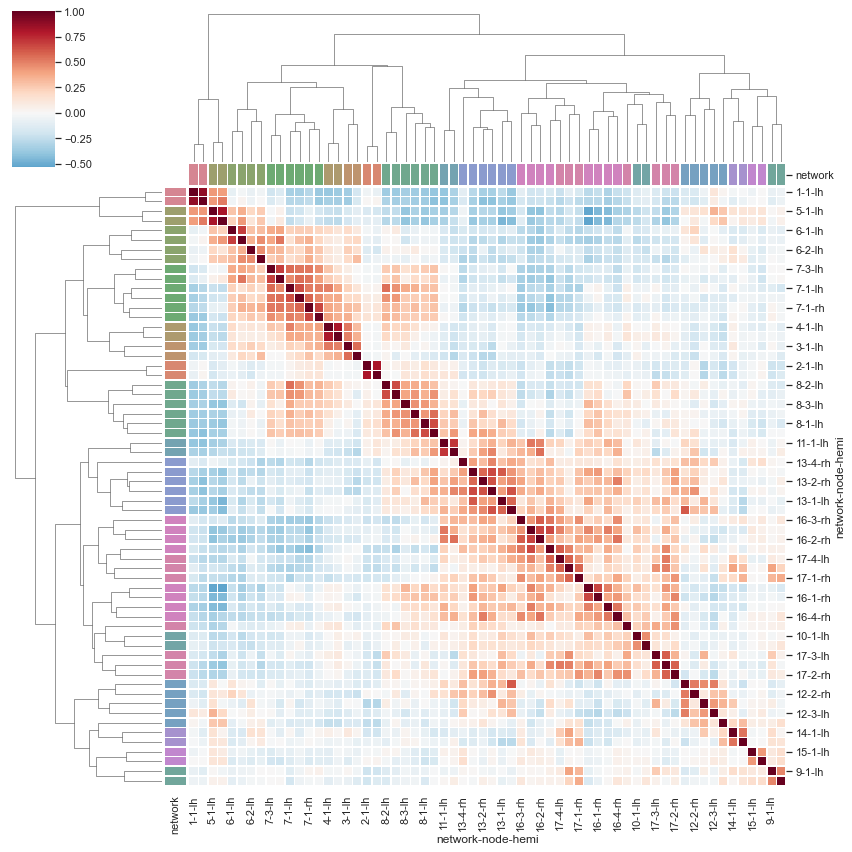

In [124]:
networks = brain_networks.columns.get_level_values('network')
used_networks = np.arange(1, 18)
used_columns = (networks.astype(int).isin(used_networks))
brain_networks = brain_networks.loc[:, used_columns]

network_pal = sns.husl_palette(17, s=.5)
network_lut = dict(zip(map(str, used_networks), network_pal))
network_colors = pd.Series(networks, index=brain_networks.columns).map(network_lut)


sns.clustermap( brain_networks.corr(), center=0, cmap='RdBu_r',
                     row_colors=network_colors, col_colors=network_colors,
                     linewidth=.5 , figsize=(12, 12));

#### 다중공선성 표시

<AxesSubplot:>

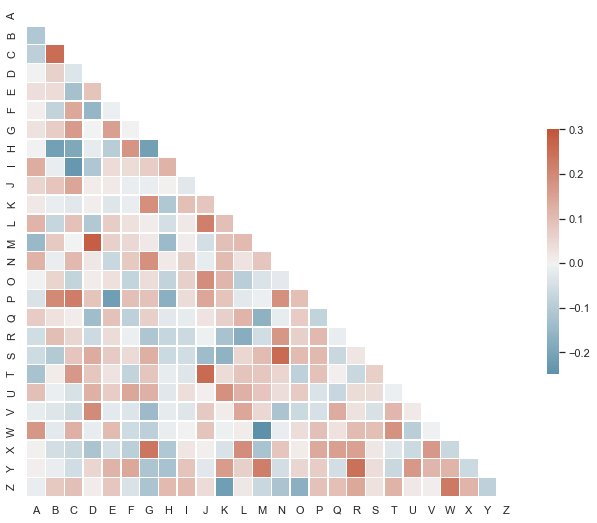

In [1]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## 선형 관계 시각화(Visualizing linear relationships)

### 선형 회귀 모델 시각화 함수

In [125]:
penguins = sns.load_dataset('penguins')
penguins.head(3)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female

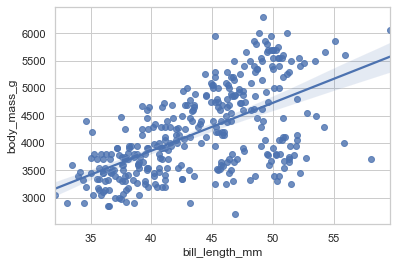

In [126]:
sns.regplot(x='bill_length_mm', y='body_mass_g',
            data=penguins);

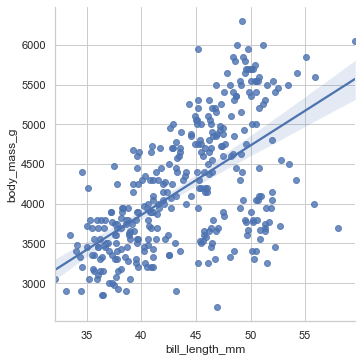

In [127]:
sns.lmplot(x='bill_length_mm', y='body_mass_g',
            data=penguins);

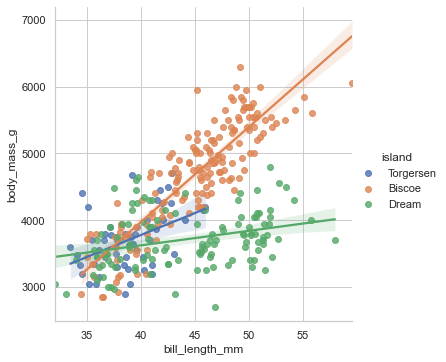

In [128]:
sns.lmplot(x='bill_length_mm', y='body_mass_g',
           hue='island',
            data=penguins);

ci 유효범위 표시

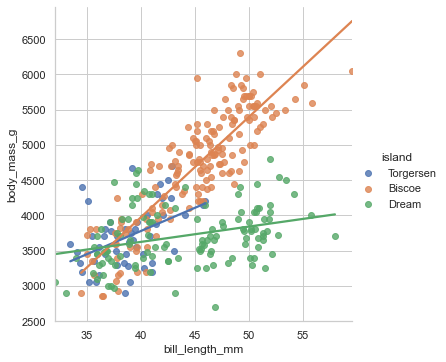

In [129]:
sns.lmplot(x='bill_length_mm', y='body_mass_g',
           hue='island',ci=None,
            data=penguins);

##### scatter_ksw= 로 포인터 사이즈 키우기

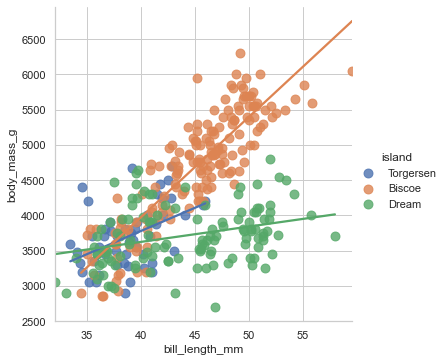

In [130]:
sns.lmplot(x='bill_length_mm', y='body_mass_g',
           hue='island',ci=None,scatter_kws={'s':80},
            data=penguins);


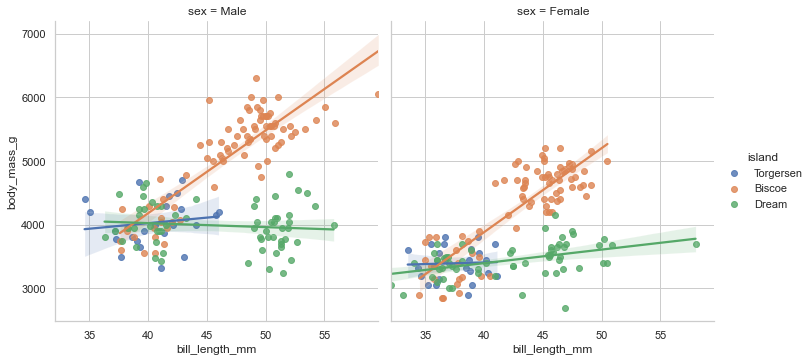

In [131]:
sns.lmplot(x='bill_length_mm', y='body_mass_g',
           col='sex',   hue='island',
            data=penguins);

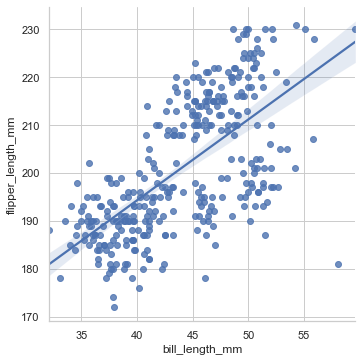

In [132]:
sns.lmplot(x='bill_length_mm', y='flipper_length_mm',
            data=penguins);

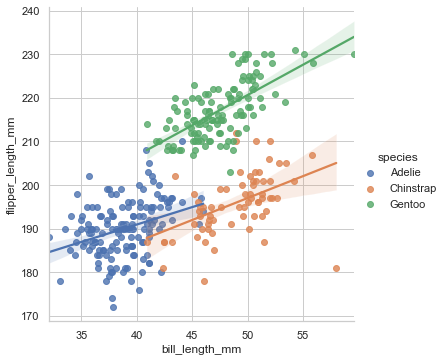

In [133]:
sns.lmplot(x='bill_length_mm', y='flipper_length_mm',
           hue='species',
            data=penguins);

##### x_estimator

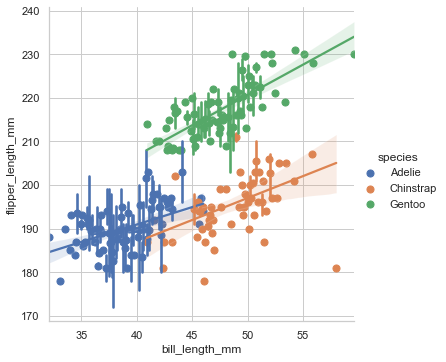

In [134]:
sns.lmplot(x='bill_length_mm', y='flipper_length_mm',
           hue='species',x_estimator=np.mean,
            data=penguins);

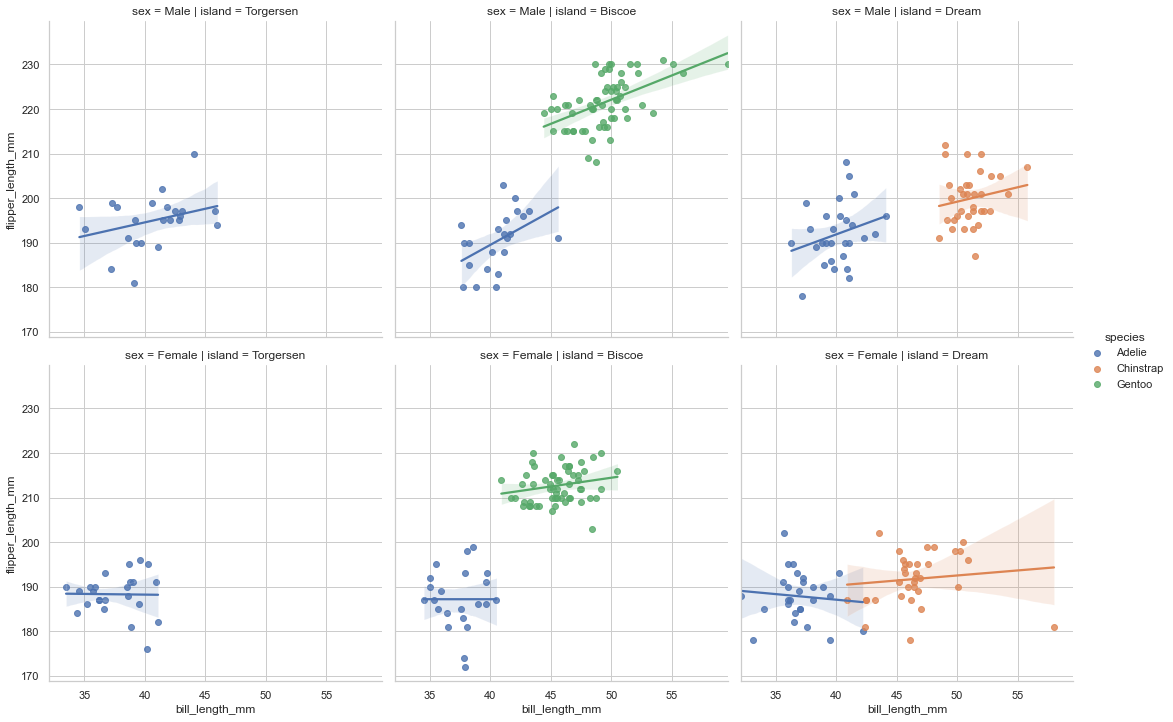

In [135]:
sns.lmplot(x='bill_length_mm', y='flipper_length_mm',
           col='island', row='sex', hue='species',
           data=penguins);

### 다른 종류의 모델

In [136]:
anscombe = sns.load_dataset('anscombe')
anscombe.head(3)

dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58

In [137]:
anscombe.describe(include='all')

dataset          x          y
count       44  44.000000  44.000000
unique       4        NaN        NaN
top        III        NaN        NaN
freq        11        NaN        NaN
mean       NaN   9.000000   7.500682
std        NaN   3.198837   1.958925
min        NaN   4.000000   3.100000
25%        NaN   7.000000   6.117500
50%        NaN   8.000000   7.520000
75%        NaN  11.000000   8.747500
max        NaN  19.000000  12.740000

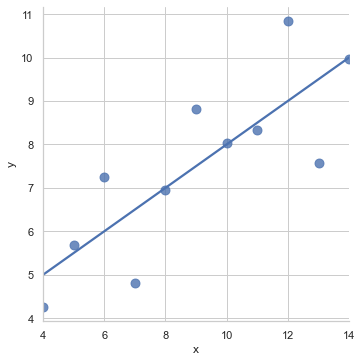

In [138]:
sns.lmplot(x='x', y='y', data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={'s':80});

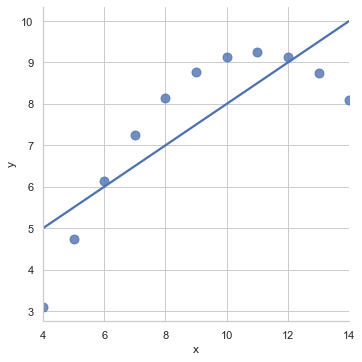

In [139]:
sns.lmplot(x='x', y='y', data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={'s':80});

#### order=2
비선형 자료 임에도 선형처럼 표시 하기 때문에 선형으로 바꾸어 보자.

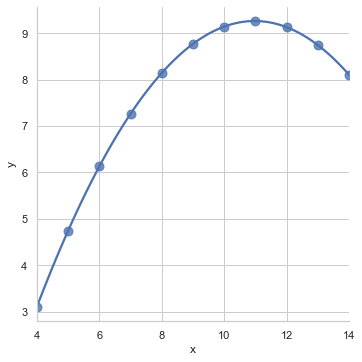

In [140]:
sns.lmplot(x='x', y='y', data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={'s':80});
# ci 유효범위 표시, sctter_ksw={'s':80} 닷 사이즈 키우기

ci=, scatter_kws

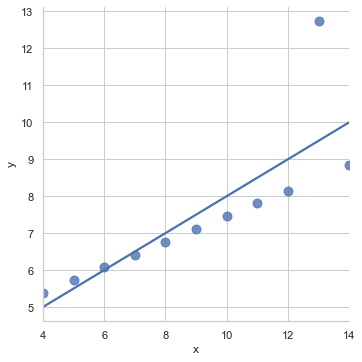

In [141]:
sns.lmplot(x='x', y='y', data=anscombe.query("dataset == 'III'"),
          ci=None, scatter_kws={'s':80}); # ci 유효범위 표시, sctter_ksw={'s':80} 닷 사이즈 키우기

robust= 위처럼 그래프 이상치에 의해서 틀려질때  그래프 튜닝

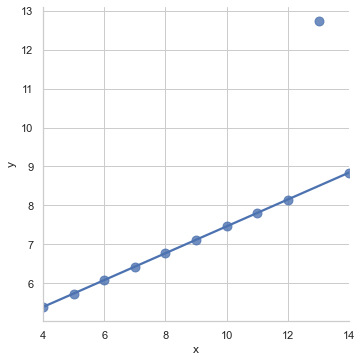

In [142]:
sns.lmplot(x='x', y='y', data=anscombe.query("dataset == 'III'"),
          robust=True,ci=None, scatter_kws={'s':80}); 

In [143]:
penguins = sns.load_dataset('penguins')
penguins['long_culmen'] = penguins.bill_length_mm > penguins['bill_length_mm'].mean()

##### y_jitter : 같은곳에 중첩되는 값이 있을경우  흝어주는 정도

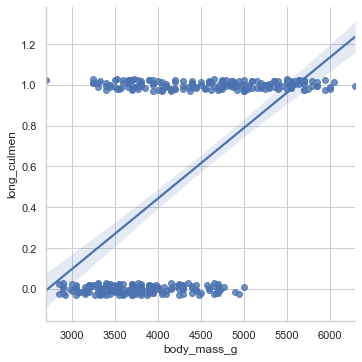

In [144]:
sns.lmplot(x='body_mass_g', y='long_culmen',
           y_jitter=.03, data=penguins);
# y_jitter : 같은곳에 중첩되는 값이 있을경우  흝어주는 정도

lmplot(logistic=True)

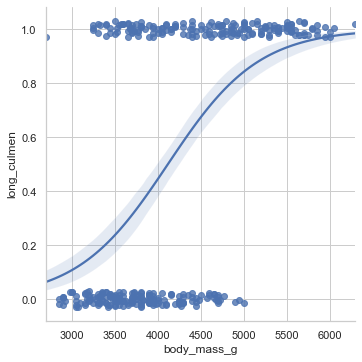

In [145]:
sns.lmplot(x='body_mass_g', y='long_culmen',
           logistic=True, y_jitter=.03, data=penguins);

lowess=
locally weighted linear regression

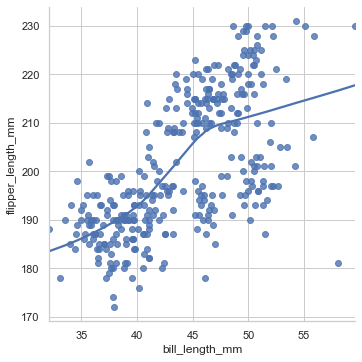

In [146]:
sns.lmplot(x='bill_length_mm', y='flipper_length_mm',
           lowess=True, data=penguins);

residplot=
잔차 그래프

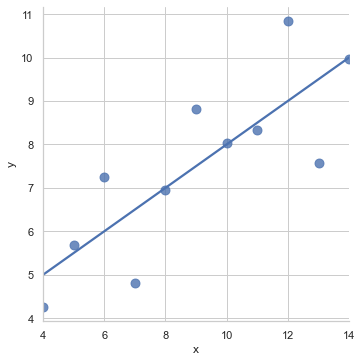

In [147]:
sns.lmplot(x='x', y='y', data=anscombe.query("dataset=='I'"),
              ci=None, scatter_kws={'s':80});

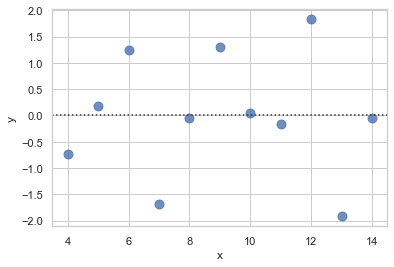

In [148]:
sns.residplot(x='x', y='y', data=anscombe.query("dataset=='I'"),
              scatter_kws={'s':80});

In [149]:
anscombe.query("dataset=='II'")

dataset     x     y
11      II  10.0  9.14
12      II   8.0  8.14
13      II  13.0  8.74
14      II   9.0  8.77
15      II  11.0  9.26
16      II  14.0  8.10
17      II   6.0  6.13
18      II   4.0  3.10
19      II  12.0  9.13
20      II   7.0  7.26
21      II   5.0  4.74

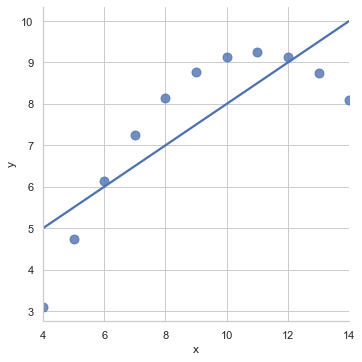

In [150]:
sns.lmplot(x='x', y='y', data=anscombe.query("dataset=='II'"),
           ci=None,   scatter_kws={'s':80});

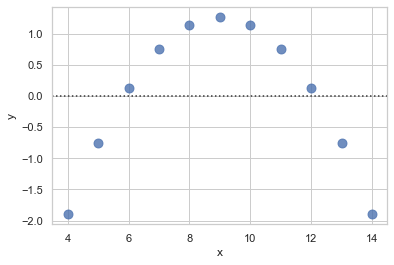

In [151]:
sns.residplot(x='x', y='y', data=anscombe.query("dataset=='II'"),
              scatter_kws={'s':80});

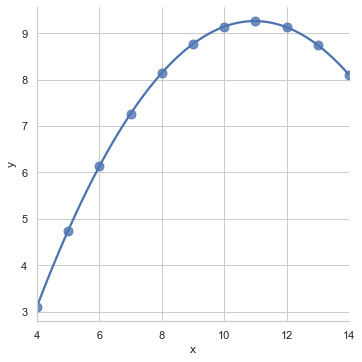

In [152]:
sns.lmplot(x='x', y='y', data=anscombe.query("dataset=='II'"),
           order=2, scatter_kws={'s':80});

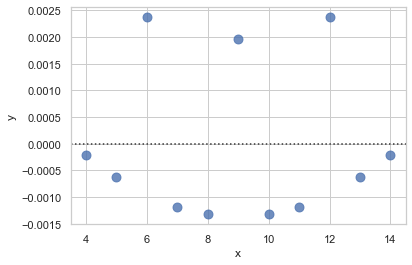

In [153]:
sns.residplot(x='x', y='y', data=anscombe.query("dataset=='II'"),
            order=2, scatter_kws={'s':80});

### 다른 상황의 회귀

In [154]:
penguins = sns.load_dataset('penguins')
penguins.head(3)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female

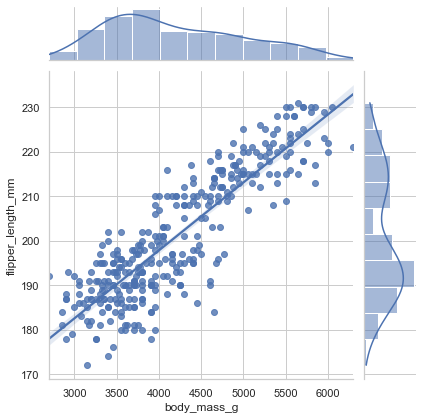

In [155]:
sns.jointplot(x='body_mass_g', y='flipper_length_mm',
              kind='reg', data=penguins);

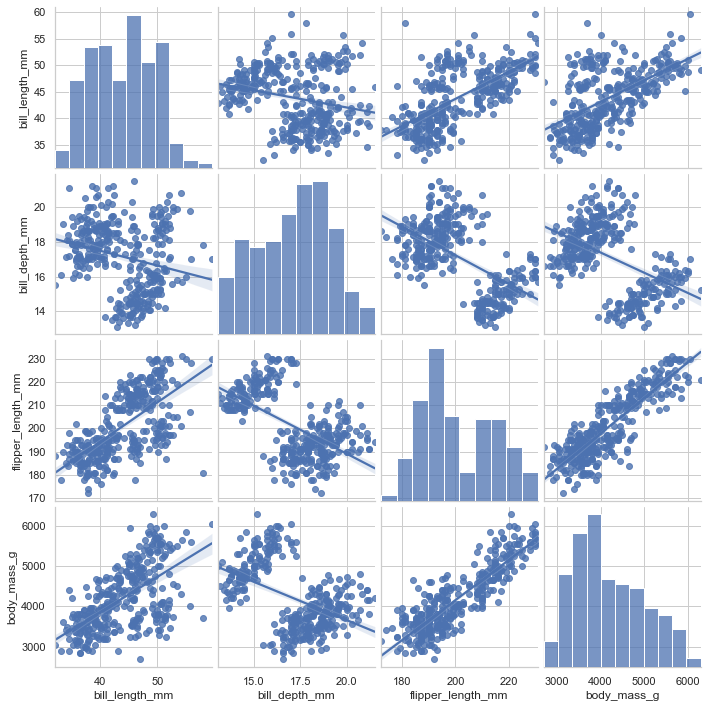

In [157]:
sns.pairplot(penguins,kind='reg');

In [158]:
penguins = sns.load_dataset('penguins')
penguins.head(3)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female

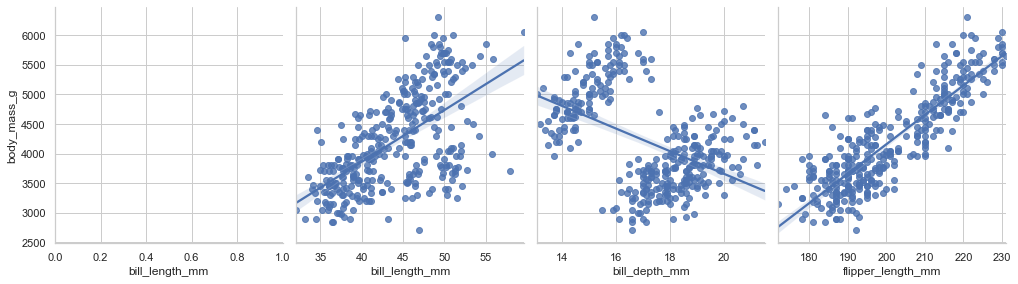

In [159]:
sns.pairplot(penguins, 
             x_vars=['bill_length_mm', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
             y_vars=['body_mass_g'],
             height=4, aspect=.9,
             kind="reg");

첫번째거가 안나오는데 왜그른지 오류를 못 잡겠음

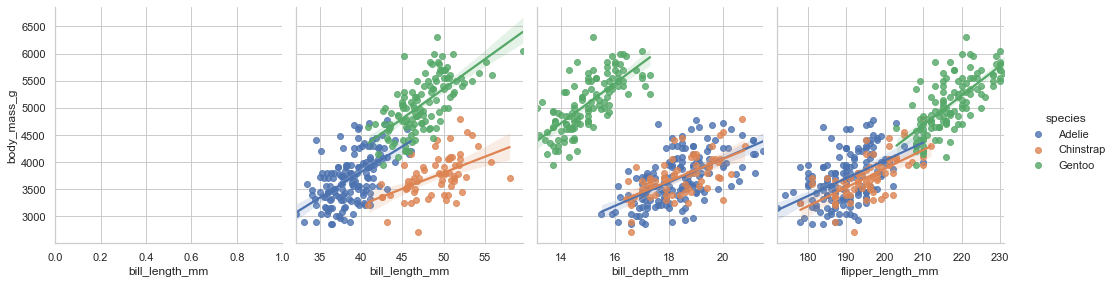

In [160]:
sns.pairplot(penguins, 
             x_vars=['bill_length_mm', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
             y_vars=['body_mass_g'], hue='species',
             height=4, aspect=.9,
             kind="reg");

## 구조화된 다중 플롯 그리드

### FacetGrid

In [161]:
penguins = sns.load_dataset('penguins')
penguins.head(3)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female

In [162]:
sns.set(style='ticks')

#### g 객체에 sns.FacetGrid 해서 담아 놓은 후에

g.map 을 이용해서 histogram을 그리면 편핟. 

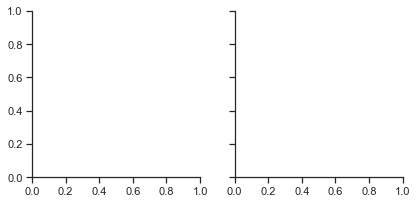

In [163]:
g = sns.FacetGrid(penguins, col='sex')

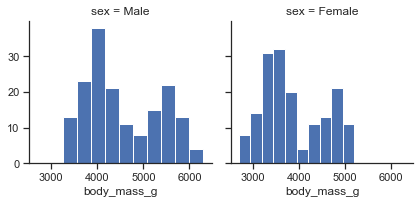

In [164]:
g.map(plt.hist, 'body_mass_g');

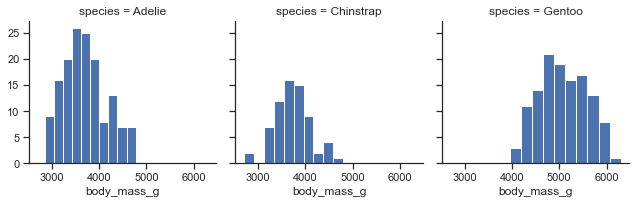

In [165]:
g = sns.FacetGrid(penguins, col='species')
g.map(plt.hist, 'body_mass_g');

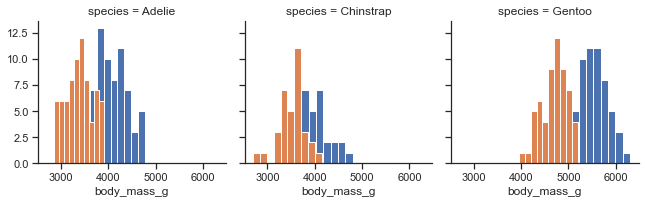

In [166]:
g = sns.FacetGrid(penguins, col='species', hue='sex')
g.map(plt.hist, 'body_mass_g');

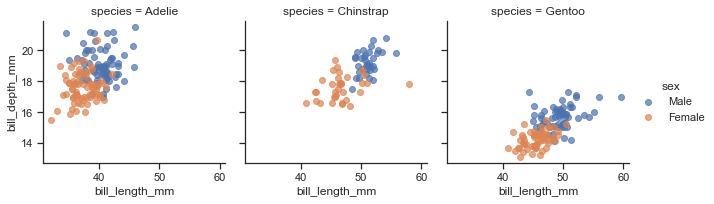

In [167]:
g = sns.FacetGrid(penguins, col='species', hue='sex')
g.map(plt.scatter, 'bill_length_mm', 'bill_depth_mm', alpha=.7)
g.add_legend();

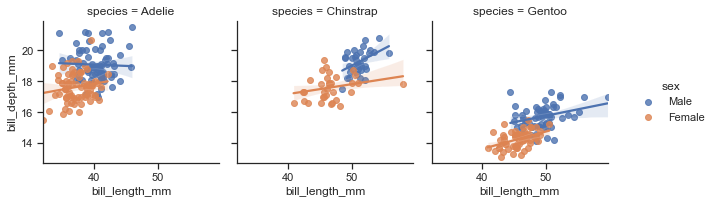

In [168]:
g = sns.FacetGrid(penguins, col='species', hue='sex', margin_titles=True)
g.map(sns.regplot, 'bill_length_mm', 'bill_depth_mm')
g.add_legend();

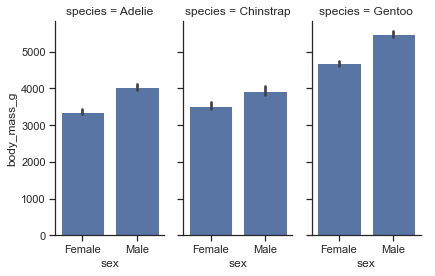

In [169]:
g = sns.FacetGrid(penguins, col='species', height=4, aspect=.5)
g.map(sns.barplot, 'sex', 'body_mass_g', order=['Female','Male'])
g.add_legend();

In [170]:
tips = sns.load_dataset('tips')
tips.head(3)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3

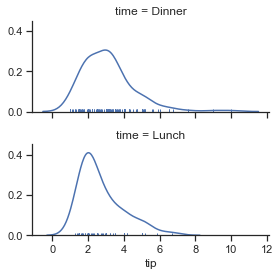

In [171]:
ordered_times = tips.time.value_counts().index
g = sns.FacetGrid(tips, row='time', row_order=ordered_times,
                  height=2, aspect=2)

g.map(sns.distplot, 'tip', hist=False, rug=True);

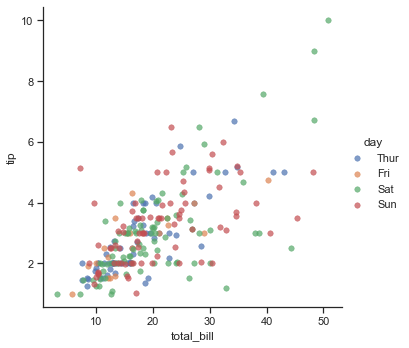

In [172]:
g = sns.FacetGrid(tips, hue='day', height=5)
g.map(plt.scatter, 'total_bill', 'tip', s=30, alpha=.7, linewidth=.5)
g.add_legend();

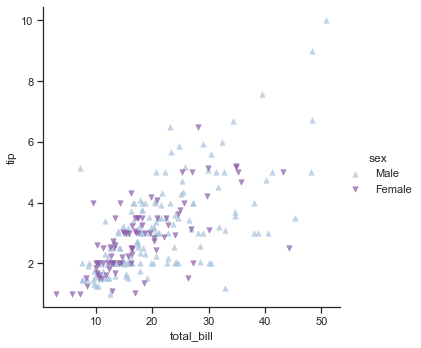

In [173]:
g = sns.FacetGrid(tips, hue='sex',palette='BuPu', 
                  hue_kws={'marker':["^","v"]}, height=5)
g.map(plt.scatter, 'total_bill', 'tip', s=30, alpha=.7, linewidth=.5)
g.add_legend();

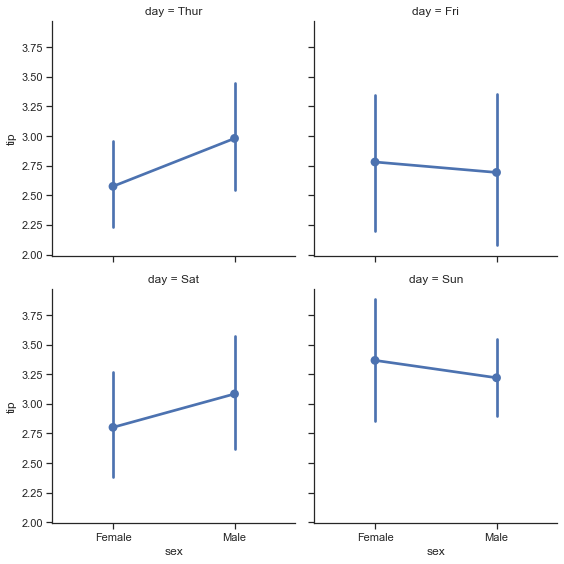

In [174]:
g = sns.FacetGrid(tips, col='day', col_wrap=2, height=4)
g.map(sns.pointplot, 'sex', 'tip', order=['Female', 'Male']);

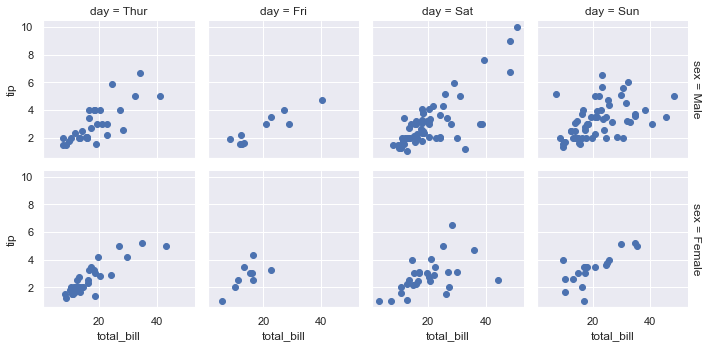

In [175]:
with sns.axes_style('darkgrid'):
    g = sns.FacetGrid(tips, row='sex', col='day', margin_titles=True, height=2.5)

g.map(plt.scatter, 'total_bill', 'tip')

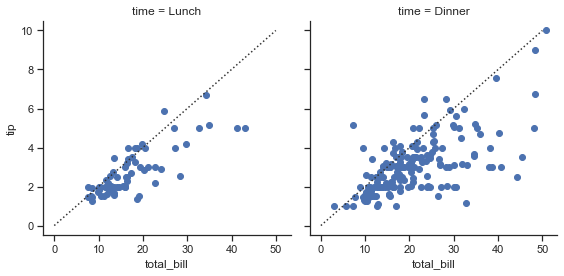

In [176]:
g = sns.FacetGrid(tips, col='time', margin_titles=True, height=4)
g.map(plt.scatter, 'total_bill', 'tip')
for ax in g.axes.flat:
    ax.plot((0, 50), (0, .2 * 50), c='.2', ls=':');

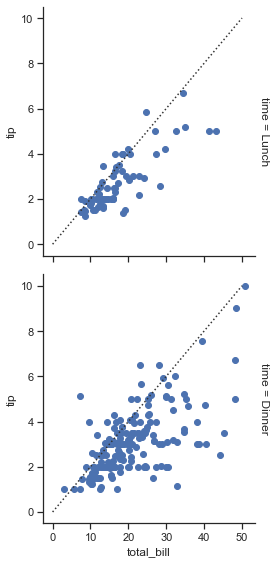

In [177]:
g = sns.FacetGrid(tips, row='time', margin_titles=True, height=4)
g.map(plt.scatter, 'total_bill', 'tip')
for ax in g.axes.flat:
    ax.plot((0, 50), (0, .2 * 50), c='.2', ls=':');

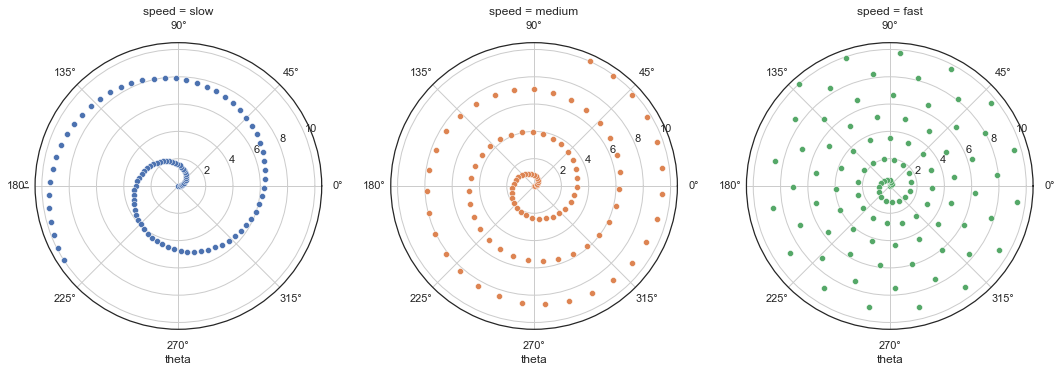

In [178]:
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'r':r, 'slow':r, 'medium':2 * r, 'fast': 4 * r})
df = pd.melt(df, id_vars=['r'], var_name='speed', value_name='theta')

g = sns.FacetGrid(df, col='speed', hue='speed',
                  subplot_kws=dict(projection='polar'), height=5,
                  sharex=False, sharey=False, despine=False)

g.map(sns.scatterplot, "theta", "r");

### 커스텀 함수(Custom functions)

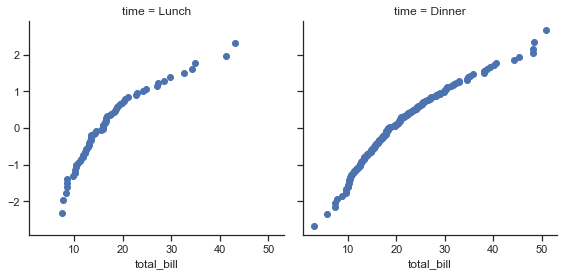

In [179]:
def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)

g = sns.FacetGrid(tips, col='time', height=4)
g.map(quantile_plot, 'total_bill');

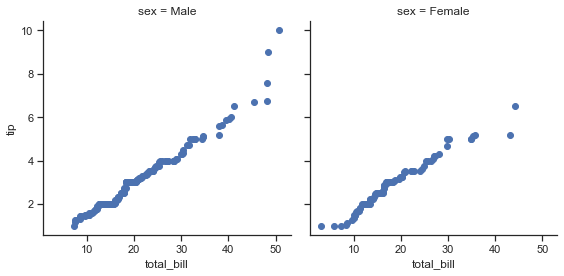

In [180]:
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

g = sns.FacetGrid(tips, col='sex', height=4)
g.map(qqplot, 'total_bill', 'tip');

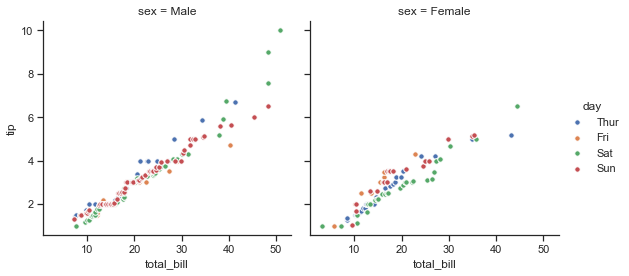

In [181]:
g = sns.FacetGrid(tips, col='sex',hue='day', height=4)
g.map(qqplot, 'total_bill', 'tip', s=30, edgecolor='w')
g.add_legend();

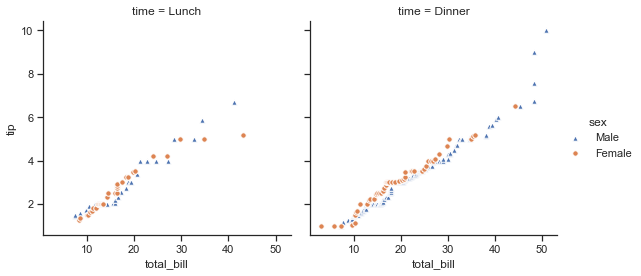

In [182]:
g = sns.FacetGrid(tips, col='time',hue='sex', height=4,
                  hue_kws={'marker':['^','o']})
g.map(qqplot, 'total_bill', 'tip', s=30, edgecolor='w')
g.add_legend();

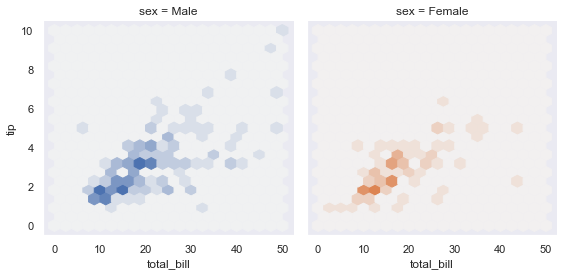

In [183]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=20, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(tips, hue='sex', col='sex', height=4)
g.map(hexbin, 'total_bill', 'tip', extent=[0, 50, 0, 10]);

### 페어와이즈 데이터 관계(pairwise data relationships)

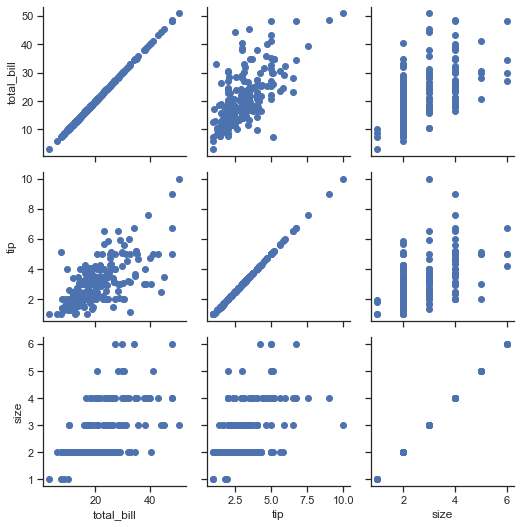

In [186]:
g = sns.PairGrid(tips) # 구조 생성
g.map(plt.scatter);

map_diag : 위치 지정해서 원하는 곳에 다른 형태의 그래프 그리기

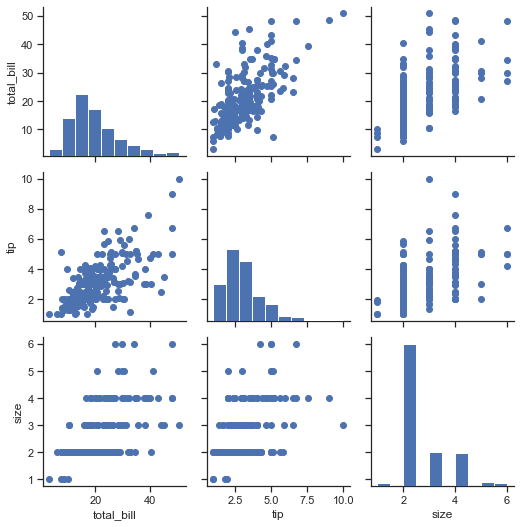

In [187]:
g = sns.PairGrid(tips)
g.map_diag(plt.hist) # 대각선 부분 설정
g.map_offdiag(plt.scatter); # 다른쪽 설정

###### hue=

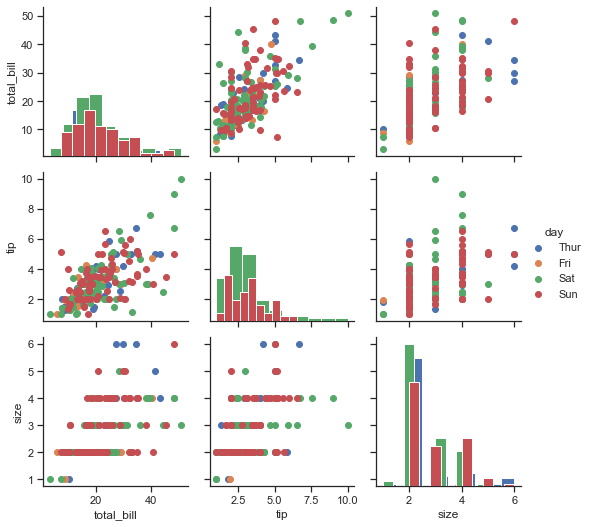

In [190]:
g = sns.PairGrid(tips, hue='day')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

######  원하는 변수만 넣기 vars=[]

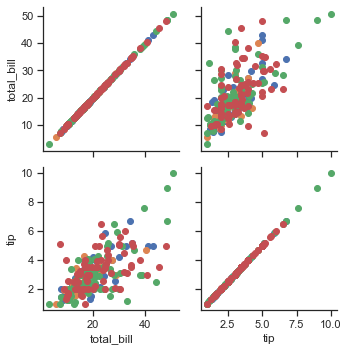

In [191]:
g = sns.PairGrid(tips, vars=['total_bill', 'tip'], hue='day')
g.map(plt.scatter);

###### 위치 지정하기 upper, lower, diag

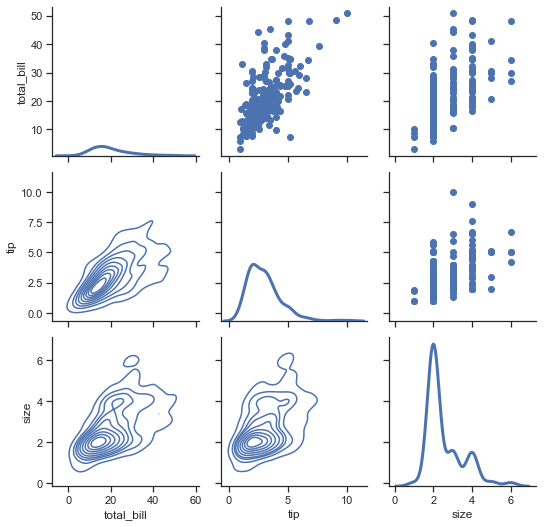

In [194]:
g = sns.PairGrid(tips)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)
g.add_legend();

원하는 변수만 가져와서 그리기 y_vars, x_vars=

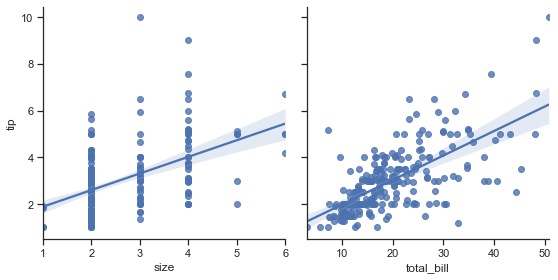

In [196]:
g = sns.PairGrid(tips, y_vars=['tip'],
                 x_vars=['size', 'total_bill'], height=4)
g.map(sns.regplot);

palette 지정

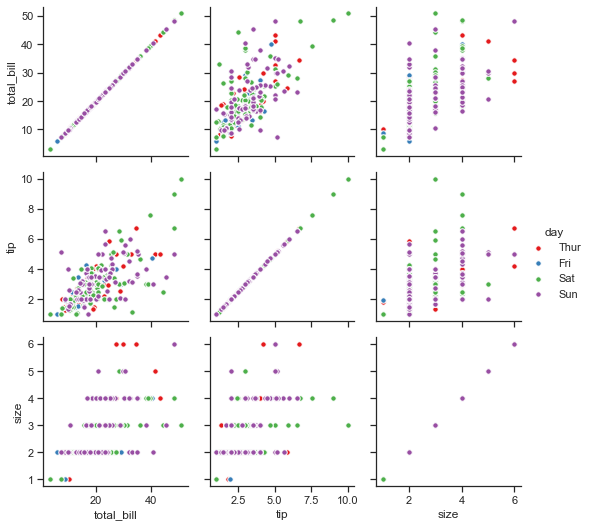

In [197]:
g = sns.PairGrid(tips, hue='day', palette='Set1')
g.map(plt.scatter, s=30, edgecolor='white')
g.add_legend();

pairplot Vs PairGrid

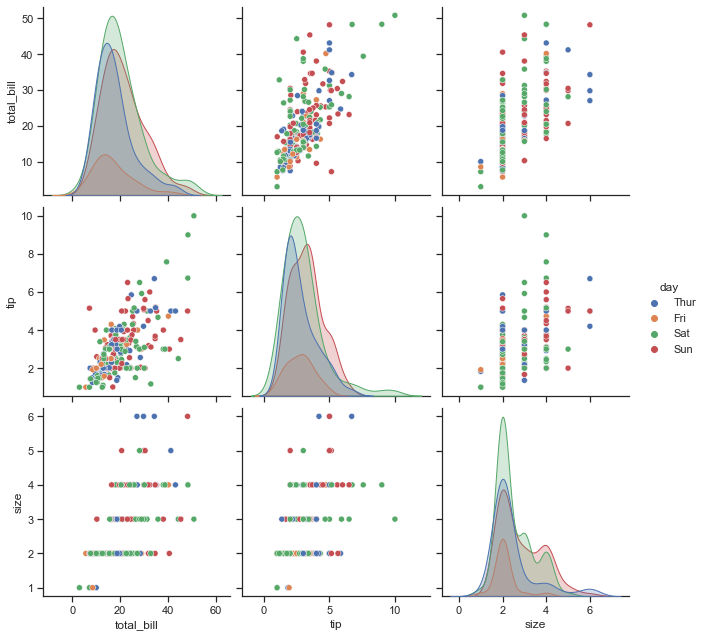

In [198]:
sns.pairplot(tips, hue='day', height=3);

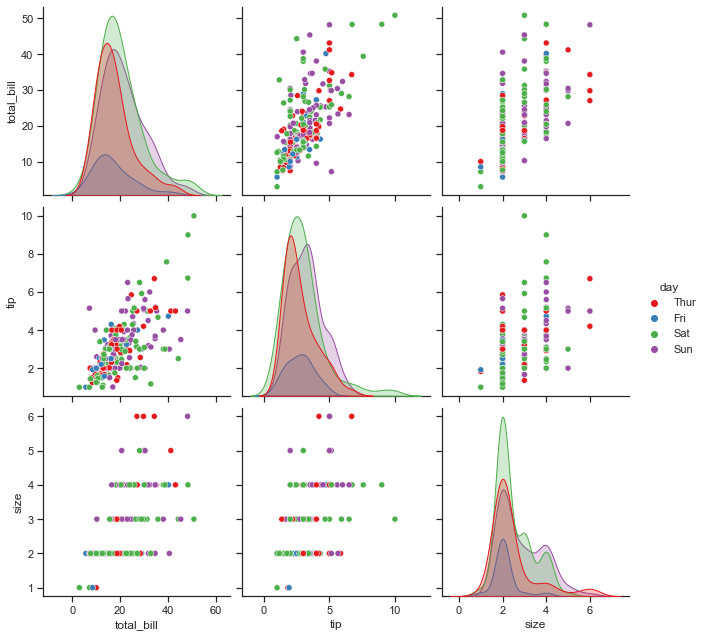

In [199]:
sns.pairplot(tips, hue='day', palette='Set1', diag_kind='kde', height=3);

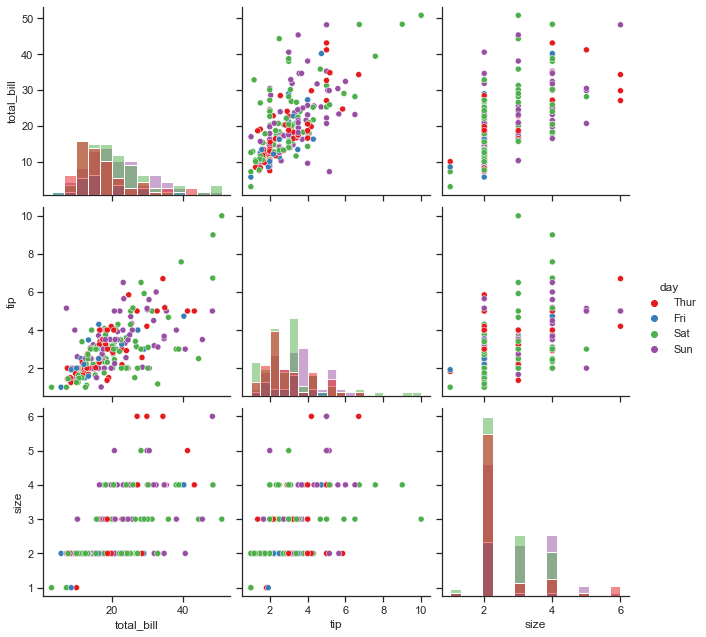

In [200]:
sns.pairplot(tips, hue='day', palette='Set1', diag_kind='hist', height=3);

## 그림 미학 제어

In [201]:
def randplot(flip=1):
    for i in range(1, 7):
        plt.plot(np.random.randn(50).cumsum());

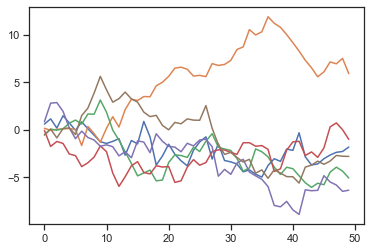

In [202]:
randplot()

### Seaborn 스타일

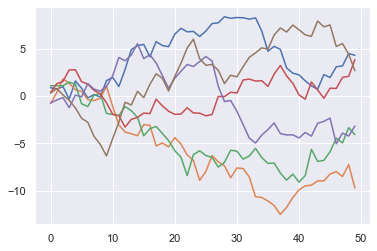

In [203]:
sns.set()
randplot();

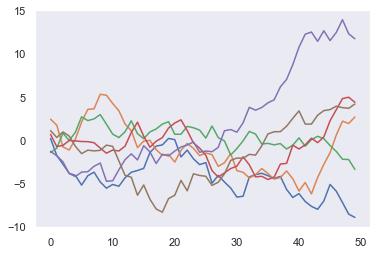

In [204]:
sns.set_style('dark')
randplot();

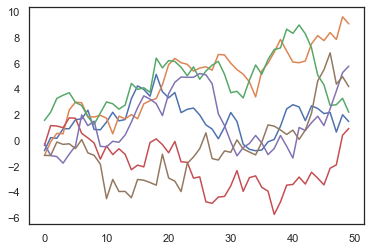

In [205]:
sns.set_style('white')
randplot();

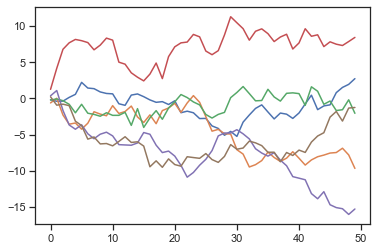

In [207]:
sns.set_style('ticks')
randplot();

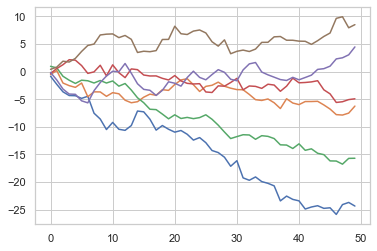

In [214]:
sns.set_style('whitegrid')
randplot();

### 축 스핀 제거

In [215]:
d = np.random.randn(50).reshape(10, 5)
d

array([[-0.94407945, -0.75094406, -0.33500928, -2.28685931, -0.8444339 ],
       [ 0.49438577, -0.93230667, -0.91619704, -0.71641063, -1.03800242],
       [-1.3197574 ,  0.60942588,  1.56495317,  0.5703491 , -1.3240506 ],
       [ 0.44569174,  0.06126855, -0.4927857 , -1.23320152,  0.03308203],
       [-3.27055773, -0.37741476, -0.57907141,  0.53525008, -0.37368787],
       [-0.02079083,  0.841567  , -0.02081094, -0.41270678, -0.20452783],
       [-0.47514591, -1.00522021, -0.43996584, -0.25485289,  0.01671486],
       [-1.78965786, -0.87080561, -0.89155794,  0.0951073 , -2.76772983],
       [-1.46901966, -0.35175927,  1.69602379, -0.73817304, -0.53337325],
       [-1.18196396,  1.01421429,  0.43273506, -1.69325705, -1.745705  ]])

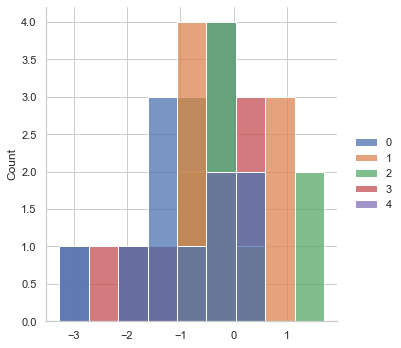

In [218]:
sns.displot(d);

무슨 차이인지 모르겠다 -_-;;

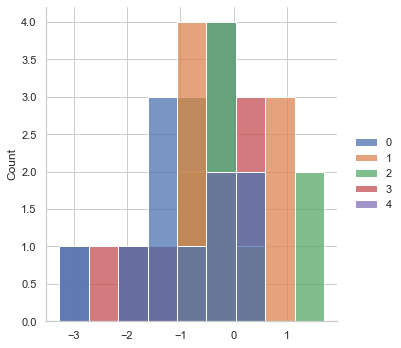

In [219]:
sns.displot(d)
sns.despine();

<AxesSubplot:>

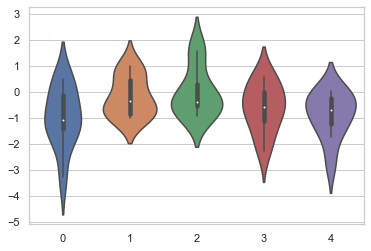

In [220]:
sns.violinplot(data=d)

살짝 뛰어서 재거해 보아~용

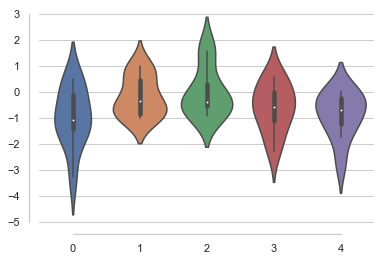

In [221]:
sns.violinplot(data=d)
sns.despine(offset=10, trim=True);

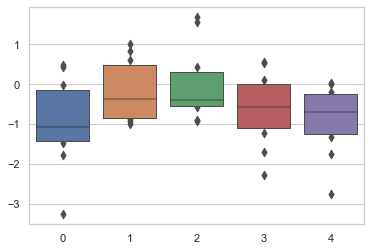

In [222]:
sns.boxenplot(data=d, palette='deep');

왼쪽만 없애기

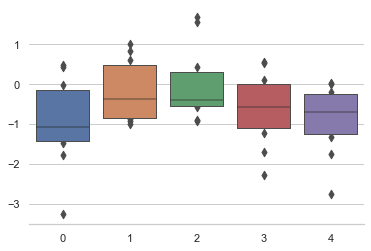

In [223]:
sns.boxenplot(data=d, palette='deep')
sns.despine(left=True);

### 스타일 임시 설정

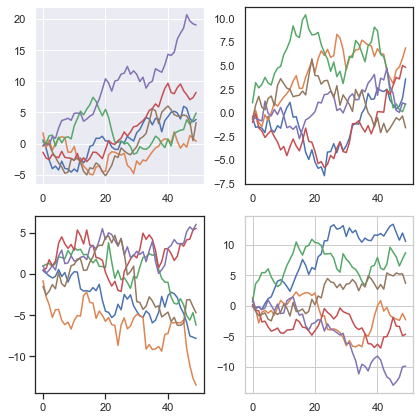

In [226]:
f = plt.figure(figsize=(6, 6))
gs = f.add_gridspec(2, 2)

with sns.axes_style('darkgrid'):
    ax =f.add_subplot(gs[0, 0])
    randplot()

with sns.axes_style('white'):
    ax =f.add_subplot(gs[0, 1])
    randplot()
    
with sns.axes_style('ticks'):
    ax =f.add_subplot(gs[1, 0])
    randplot()
    
with sns.axes_style('whitegrid'):
    ax =f.add_subplot(gs[1, 1])
    randplot()

f.tight_layout()

### 스타일 요소 재정의

In [227]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

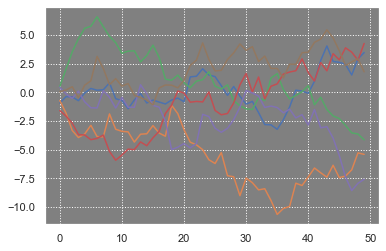

In [229]:
sns.set_style("darkgrid", {'axes.facecolor':'.5', 'grid.linestyle':':'})
randplot();

### 스케일링 플롯 요소

In [230]:
sns.set()

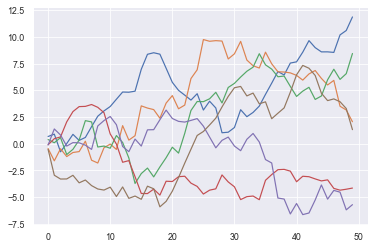

In [231]:
sns.set_context('paper')
randplot();

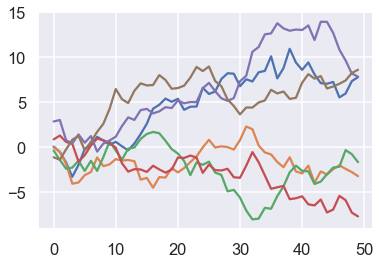

In [232]:
sns.set_context('talk')
randplot();

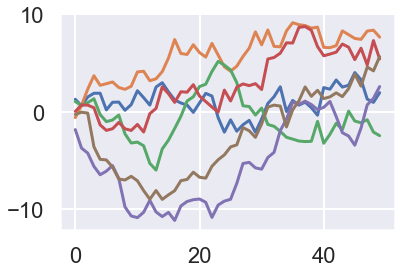

In [233]:
sns.set_context('poster')
randplot();

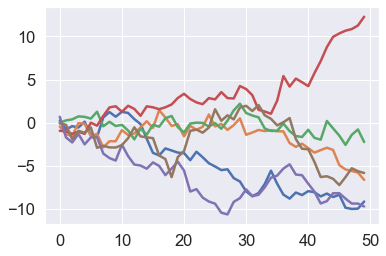

In [234]:
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':2.5})
randplot();

## 컬러 팔레트 선택

In [235]:
sns.set()

### 질적 색상 팔레트

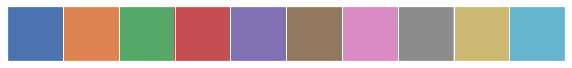

In [236]:
current_pallette = sns.color_palette()
sns.palplot(current_pallette)


#### 원형 컬러 시스템 사용

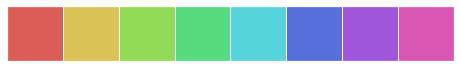

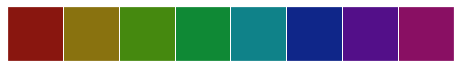

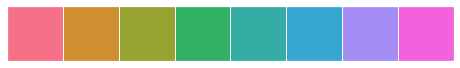

In [239]:
sns.palplot(sns.color_palette('hls', 8))
sns.palplot(sns.hls_palette(8, l= .3, s=.8))
sns.palplot(sns.color_palette('husl', 8))

#### 범주형 컬러 브루어 팔레트 사용

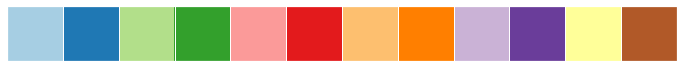

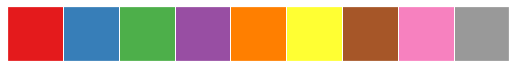

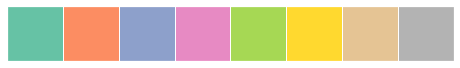

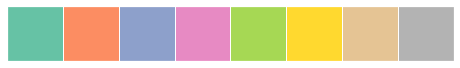

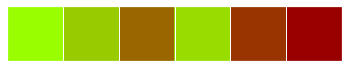

In [243]:
sns.palplot(sns.color_palette('Paired'))
sns.palplot(sns.color_palette('Set1'))
sns.palplot(sns.color_palette('Set2'))
sns.palplot(sns.color_palette('Set2'))
flatui=['#99FF00', '#99CC00', '#996600', '#99dd00', '#993300', '#990000']
sns.palplot(sns.color_palette(flatui))

#### xkcd 색상 측량에서 정의된 색상 사용

* xkcd 색상표: https://xkcd.com/color/rgb/

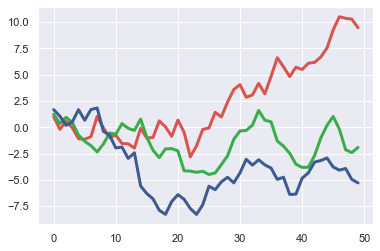

In [246]:
plt.plot(np.random.randn(50).cumsum(), sns.xkcd_rgb['pale red'], lw=3)
plt.plot(np.random.randn(50).cumsum(), sns.xkcd_rgb['medium green'], lw=3)
plt.plot(np.random.randn(50).cumsum(), sns.xkcd_rgb['denim blue'], lw=3);

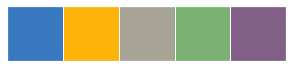

In [249]:
colors = ['windows blue', 'amber', 'greyish', 'faded green', 'dusty purple']
sns. palplot(sns.xkcd_palette(colors))

### 순차 색상 팔레트

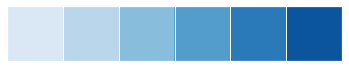

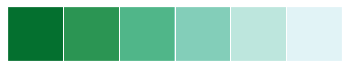

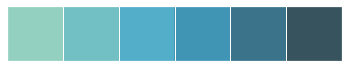

In [250]:
sns.palplot(sns.color_palette('Blues'))
sns.palplot(sns.color_palette('BuGn_r'))
sns.palplot(sns.color_palette('GnBu_d'))


#### 순차적 입방체 팔레트

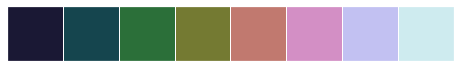

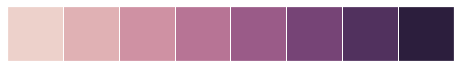

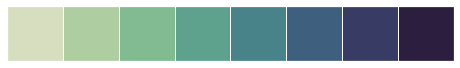

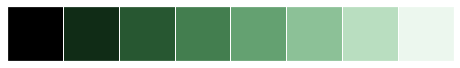

In [254]:
sns.palplot(sns.color_palette('cubehelix', 8))
sns.palplot(sns.cubehelix_palette(8))
sns.palplot(sns.cubehelix_palette(8, start=.5 , rot=-.75))
sns.palplot(sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True))

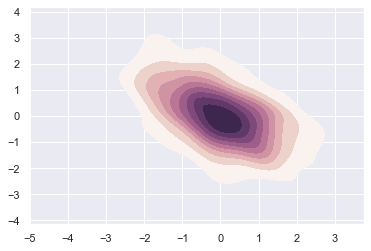

In [255]:
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]],size=500).T
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(x, y , cmap=cmap, shade=True);

#### 사용자 정의 순차적 팔레트

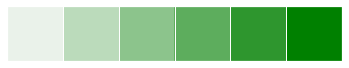

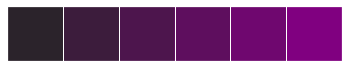

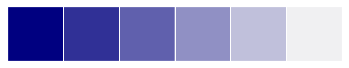

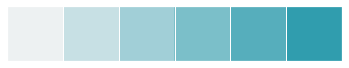

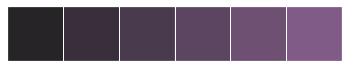

In [256]:
sns.palplot(sns.light_palette('green'))
sns.palplot(sns.dark_palette('purple'))
sns.palplot(sns.light_palette('navy', reverse=True))
sns.palplot(sns.light_palette((210, 90, 60 ), input='husl'))
sns.palplot(sns.dark_palette('muted purple', input='xkcd'))

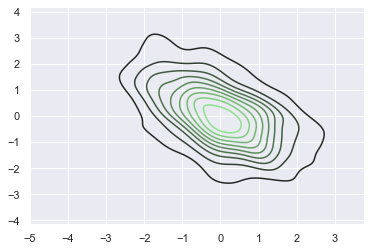

In [257]:
pal = sns.dark_palette('palegreen', as_cmap=True)
sns.kdeplot(x, y , cmap=pal);

### 색상 팔레트 나누기

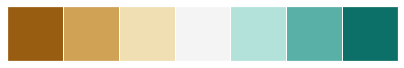

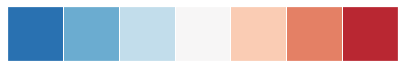

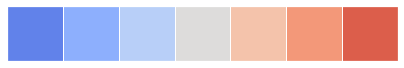

In [259]:
sns.palplot(sns.color_palette('BrBG', 7))
sns.palplot(sns.color_palette('RdBu_r', 7))
sns.palplot(sns.color_palette('coolwarm', 7))

#### 커스텀 분기 팔레트

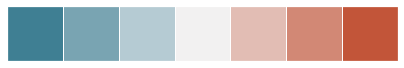

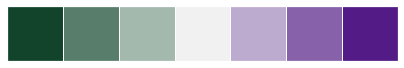

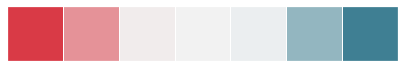

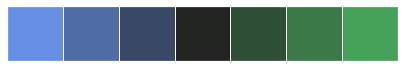

In [262]:
sns.palplot(sns.diverging_palette(220,20, n=7))
sns.palplot(sns.diverging_palette(145,280,s=85, l=25, n=7))
sns.palplot(sns.diverging_palette(10, 220,sep=80, n=7))
sns.palplot(sns.diverging_palette(255, 133, l=60, center='dark', n=7))

### 기본 색상 표 설정

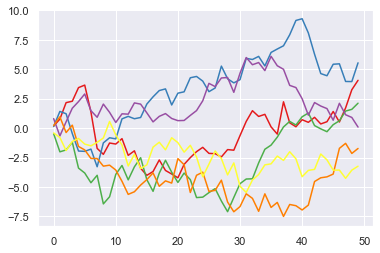

In [263]:
sns.set_palette('Set1')
randplot();

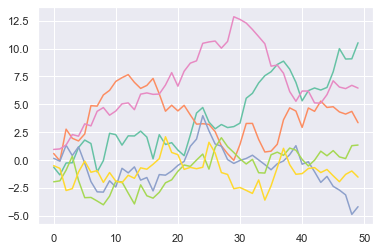

In [264]:
sns.set_palette('Set2')
randplot();


참고문헌
* Seaborn, https://seaborn.pydata.orgl
* Igor Milovanovi, "Python Data Visualization Cookbook", Packt
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Wes Mckinney, "Python for Data Analysis", O'Reilly
